# Exploratory Data Analysis (EDA) for Real Estate Pricing

Understanding How House Prices Change in a Shifting Market

##  Problem Statement

In today’s fast-changing housing market, setting the right price for a home can be tricky. Our goal is to analyze and understand the many factors that have a big impact on house prices.

### Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

* Pandas -  Used for data loading, cleaning, and manipulation in table format (DataFrames).
* Numpy - Provides mathematical functions and array operations, great for numeric data.
* Matplotlib - Used to create visualizations like line plots, bar plots, histograms, etc.
* Seaborn - Built on matplotlib, used for statistical visualizations with better style and ease.
* stats - Provides statistical tools like distributions, tests, and functions.
* norm - It is used to plot or fit a normal distribution.
* StandardScaler - Used to standardize features by removing the mean and scaling to unit variance.

### Set style for plots

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

### Step 1. Loading the Data

Load the real estate pricing dataset into a Pandas DataFrame.

In [3]:
try:
    df = pd.read_csv(r"original_dataset/housing_data.csv")
    print("Dataset loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure 'Housing_Data.csv' is in your working directory.")

Dataset loaded successfully!


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


### Checking the Dimention of Dataset

In [4]:
df.shape

(1460, 81)

The Dataset have 1460 Rows and 81 Columns.

### Step 2. Cleaning the Data

Clean the dataset by handling missing values, removing duplicates, and addressing any anomalies.

In [5]:
# Initial data inspection
print("\nDataset Info:")
display(df.info())

print("\nMissing Values:")
missing_data = pd.DataFrame({
    'Total Missing': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Percentage Missing', ascending=False)
display(missing_data[missing_data['Total Missing'] > 0])


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

None


Missing Values:


,Total Missing,Percentage Missing
Alley,1369,93.767123
MasVnrType,872,59.726027
GarageYrBlt,81,5.547945
Electrical,1,0.068493


### Drop the Unnamed: 0 column from dataset

In [6]:
df = df.drop('Unnamed: 0', axis=1)

### Handle missing values

Drop columns with more than 15% missing values

In [7]:
threshold = len(df) * 0.15
df_cleaned = df.dropna(thresh=threshold, axis=1)

### For numerical columns, fill with median

In [8]:
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].median())

### For categorical columns, fill with mode

In [9]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned.loc[:, col] = df_cleaned[col].fillna(mode_val)

###  Check for duplicates

In [10]:
print(f"\nNumber of duplicates before cleaning: {df_cleaned.duplicated().sum()}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"Number of duplicates after cleaning: {df_cleaned.duplicated().sum()}")


Number of duplicates before cleaning: 0
Number of duplicates after cleaning: 0


### Verify cleaning

In [11]:
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum().sum())


Missing values after cleaning:
0


### Step 3. Univariate Analysis

Explore individual variables to understand their distributions and characteristics.

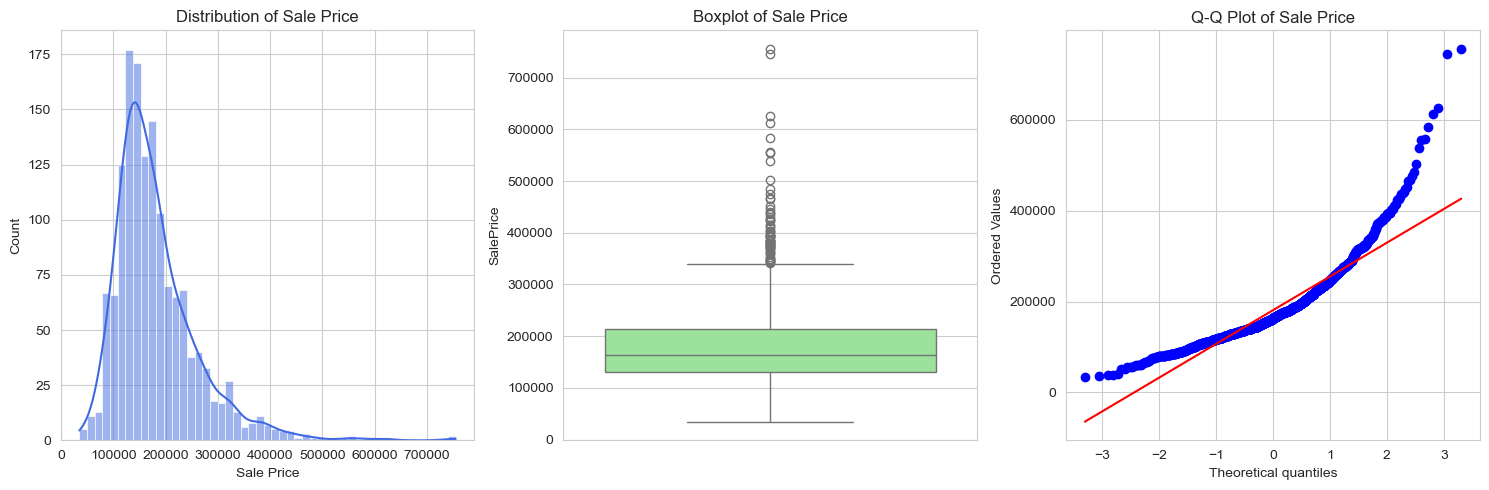

In [12]:
# Target variable analysis - SalePrice
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['SalePrice'], kde=True, color='royalblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned['SalePrice'], color='lightgreen')
plt.title('Boxplot of Sale Price')

# QQ plot
plt.subplot(1, 3, 3)
stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.title('Q-Q Plot of Sale Price')

plt.tight_layout()
plt.show()

### Insights

##### 1. Distribution of Sale Price (Histogram with KDE)
* Distribution is right-skewed, indicating more low-priced houses.
* Most sale prices fall between 100,000 and 200,000.
* Fewer houses are priced above 400,000, indicating rare high-end properties.
* The peak (mode) is around 130,000–140,000.
* KDE curve confirms the non-normal shape of the data.
* Presence of a long tail suggests potential outliers or luxury properties.

##### 2. Boxplot of Sale Price
* Median house price is around 160,000.
* A large number of outliers exist above 300,000.
* The interquartile range (IQR) spans from about 130,000 to 210,000.
* Useful for spotting pricing anomalies in the dataset.
* May suggest segmentation between standard vs luxury homes.

##### 3. Q-Q Plot of Sale Price
* Points deviate from the red line, especially at the ends — non-normal distribution.
* Strong deviation on the upper end = right skew.
* Most data lie near the line, except for extremes.

### Skewness and kurtosis

In [13]:
print("SalePrice Skewness: %f" % df_cleaned['SalePrice'].skew())
print("SalePrice Kurtosis: %f" % df_cleaned['SalePrice'].kurt())

SalePrice Skewness: 1.882876
SalePrice Kurtosis: 6.536282


###  Analyze numerical features

In [51]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
print(f"\nThe Numerical Columns Count: {len(numerical_cols)}")


The Numerical Columns Count: 44


### Plot distributions for top 12 numerical features

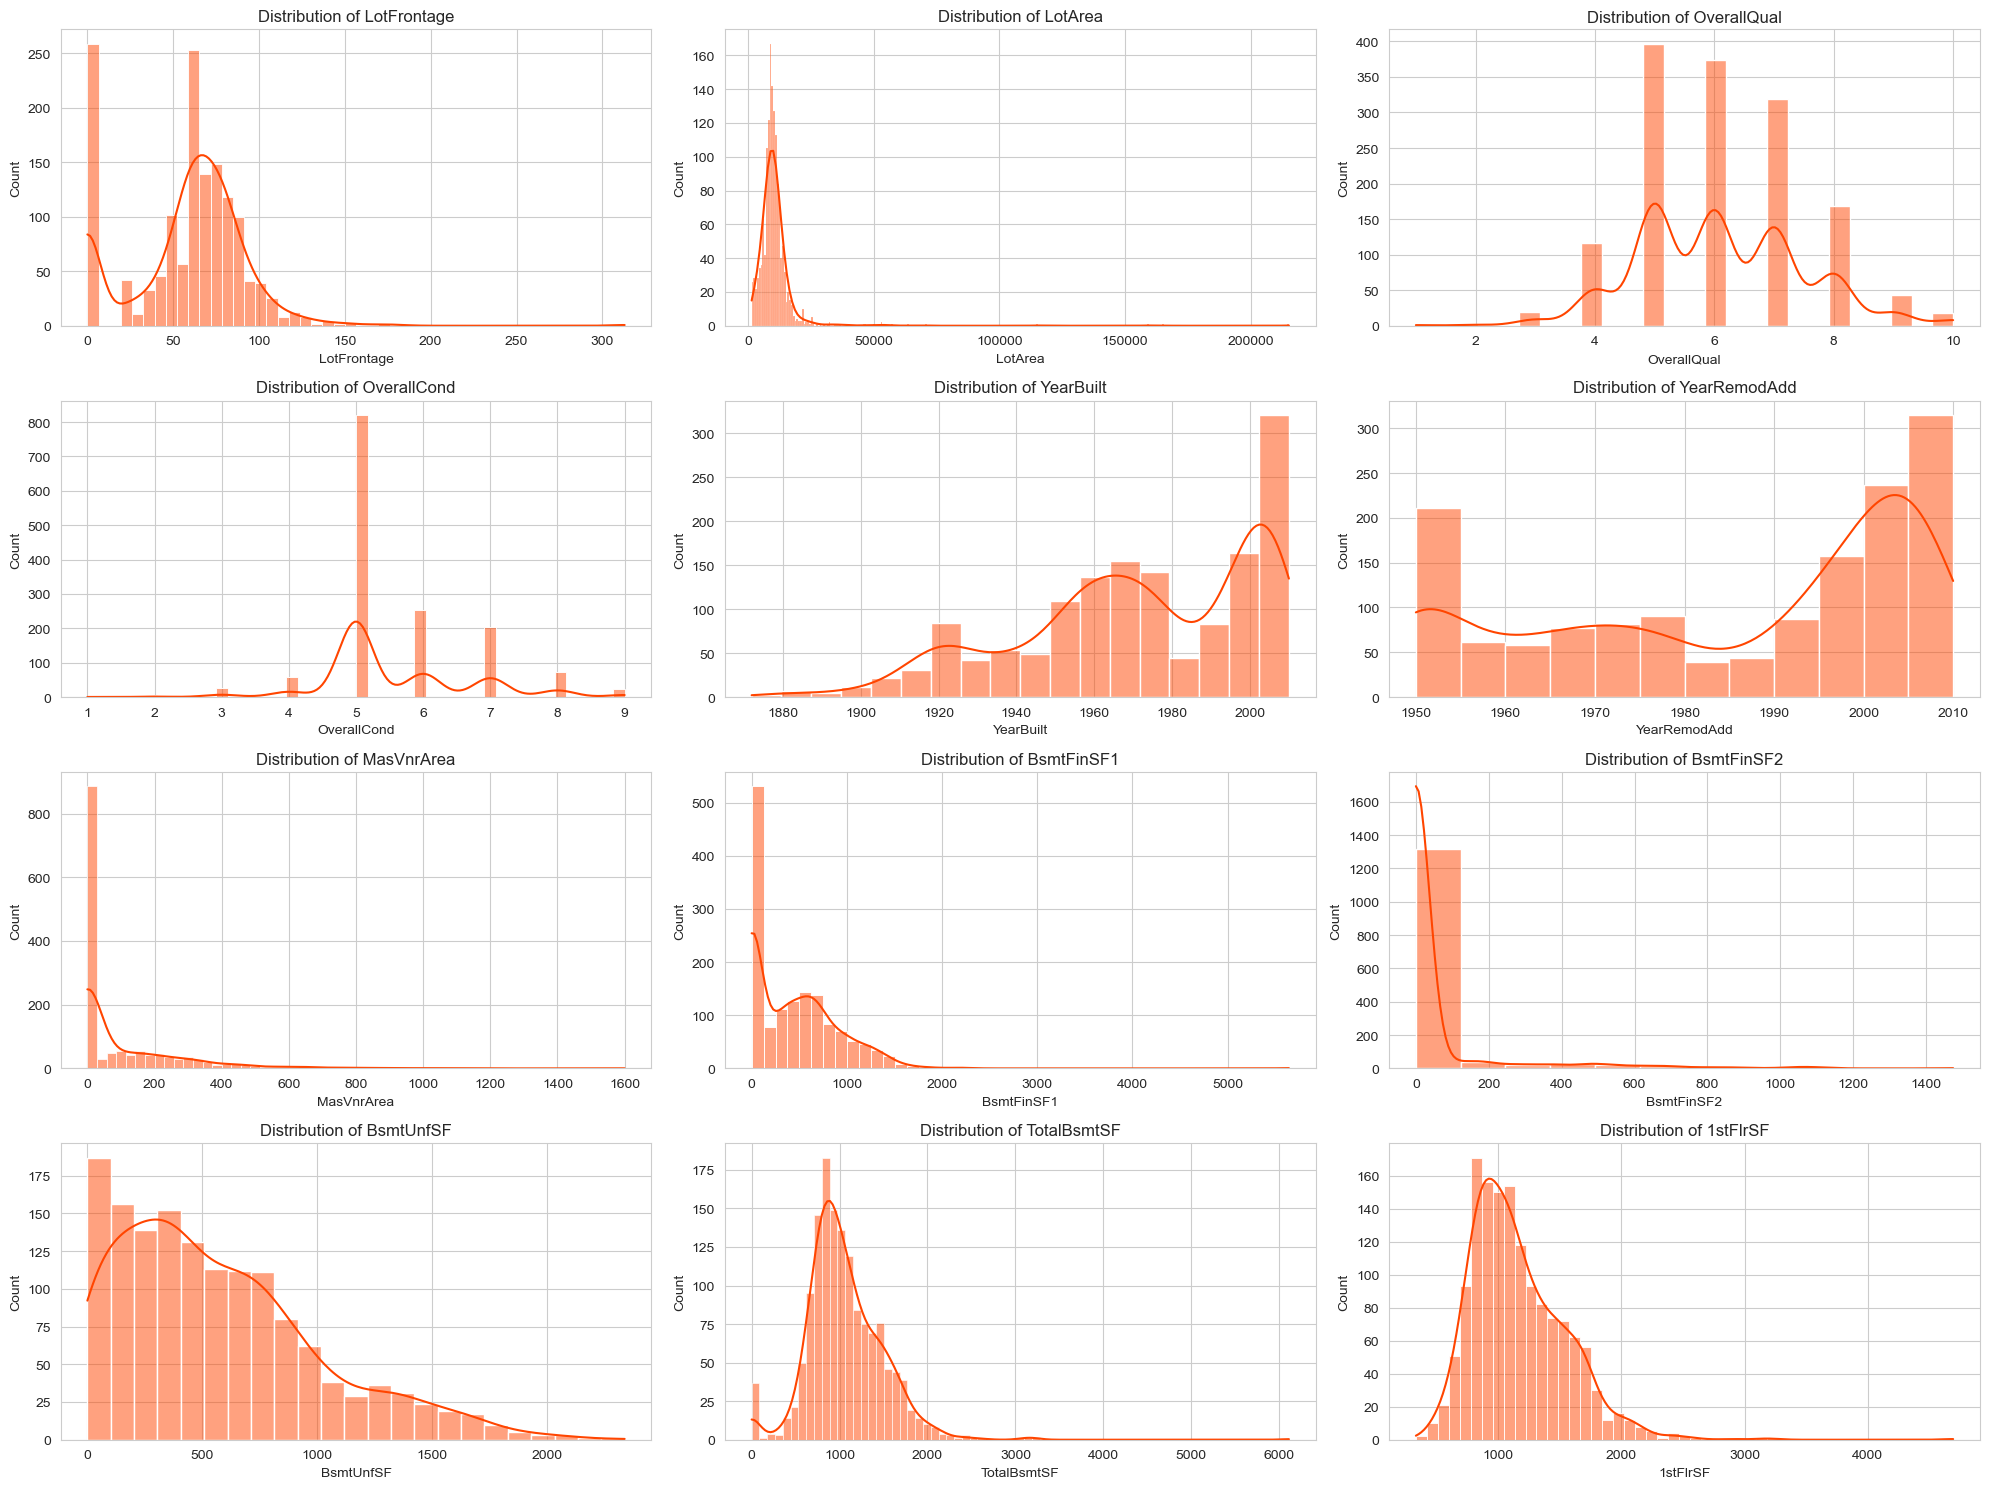

In [15]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True, color='orangered')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Insights

##### 1. LotFrontage
* Strong right skew with many values clustered at low end.
* Most houses have a frontage around 60–80 ft.
* Long tail suggests few homes with very wide lots.

##### 2. LotArea
* Highly skewed with outliers above 100,000 sqft.
* Most lot sizes are under 15,000 sqft.
* Area size could drive premium pricing for luxury homes.

##### 3. OverallQual
* Peaks at 5 to 7, indicating average to good quality.
* Nearly normal distribution.
* Strong potential predictor of SalePrice.
* Captures overall material and finish quality.

##### 4. OverallCond
* Most homes have a condition rating of 5, suggesting average condition.
* Few extreme values indicate most homes are well-maintained.

##### 5. YearBuilt
* More homes built in recent decades, especially post-2000.
* Few homes before 1940 still present.
* Newer homes may command higher prices.
* Useful for age-based features or transformations.

##### 6. YearRemodAdd
* Peaks in recent years — trend of renovations growing.
* Many homes remodeled after 2000.
* Flat periods suggest fewer renovations in mid-century.
* A key factor in predicting updated vs. outdated homes.

##### 7. MasVnrArea
* Most values are 0, indicating many houses have no veneer.
* Positive skew — some houses have large veneer areas.
* Outliers may represent premium finishes or unique designs.

##### 8. BsmtFinSF1
* Right-skewed — most homes have <1000 sqft finished basement.
* Few homes with large finished basements > 2000 sqft.
* Some values are 0, indicating unfinished basements.
* Might correlate with higher SalePrice.

##### 9. BsmtFinSF2 
* Mostly 0, meaning this second basement area is rare.
* A few peaks between 400–600 sqft.
* Skewed and sparse, may have less impact alone.


##### 10. BsmtUnfSF 
* Most homes have some unfinished space, many under 1000 sqft.
* Normal-like spread with slight right skew.
* Affects home usability — may show future potential.
* Important when calculating total basement area.

##### 11. TotalBsmtSF 
* Bimodal distribution with peaks around 800 and 1000 sqft.
* Few large basements beyond 2000 sqft.
* Useful feature for total livable space analysis.

##### 12. 1stFlrSF 
* Right-skewed — majority of homes around 1000–1500 sqft.
* Some outliers with large first floors.
* Key part of total above-ground living area.
* Strong predictor of home value.

### Analyze categorical features

In [50]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print(f"\nThe Categorical Columns Count: {len(categorical_cols)}")


The Categorical Columns Count: 44


### Plot distributions for top 6 categorical features)

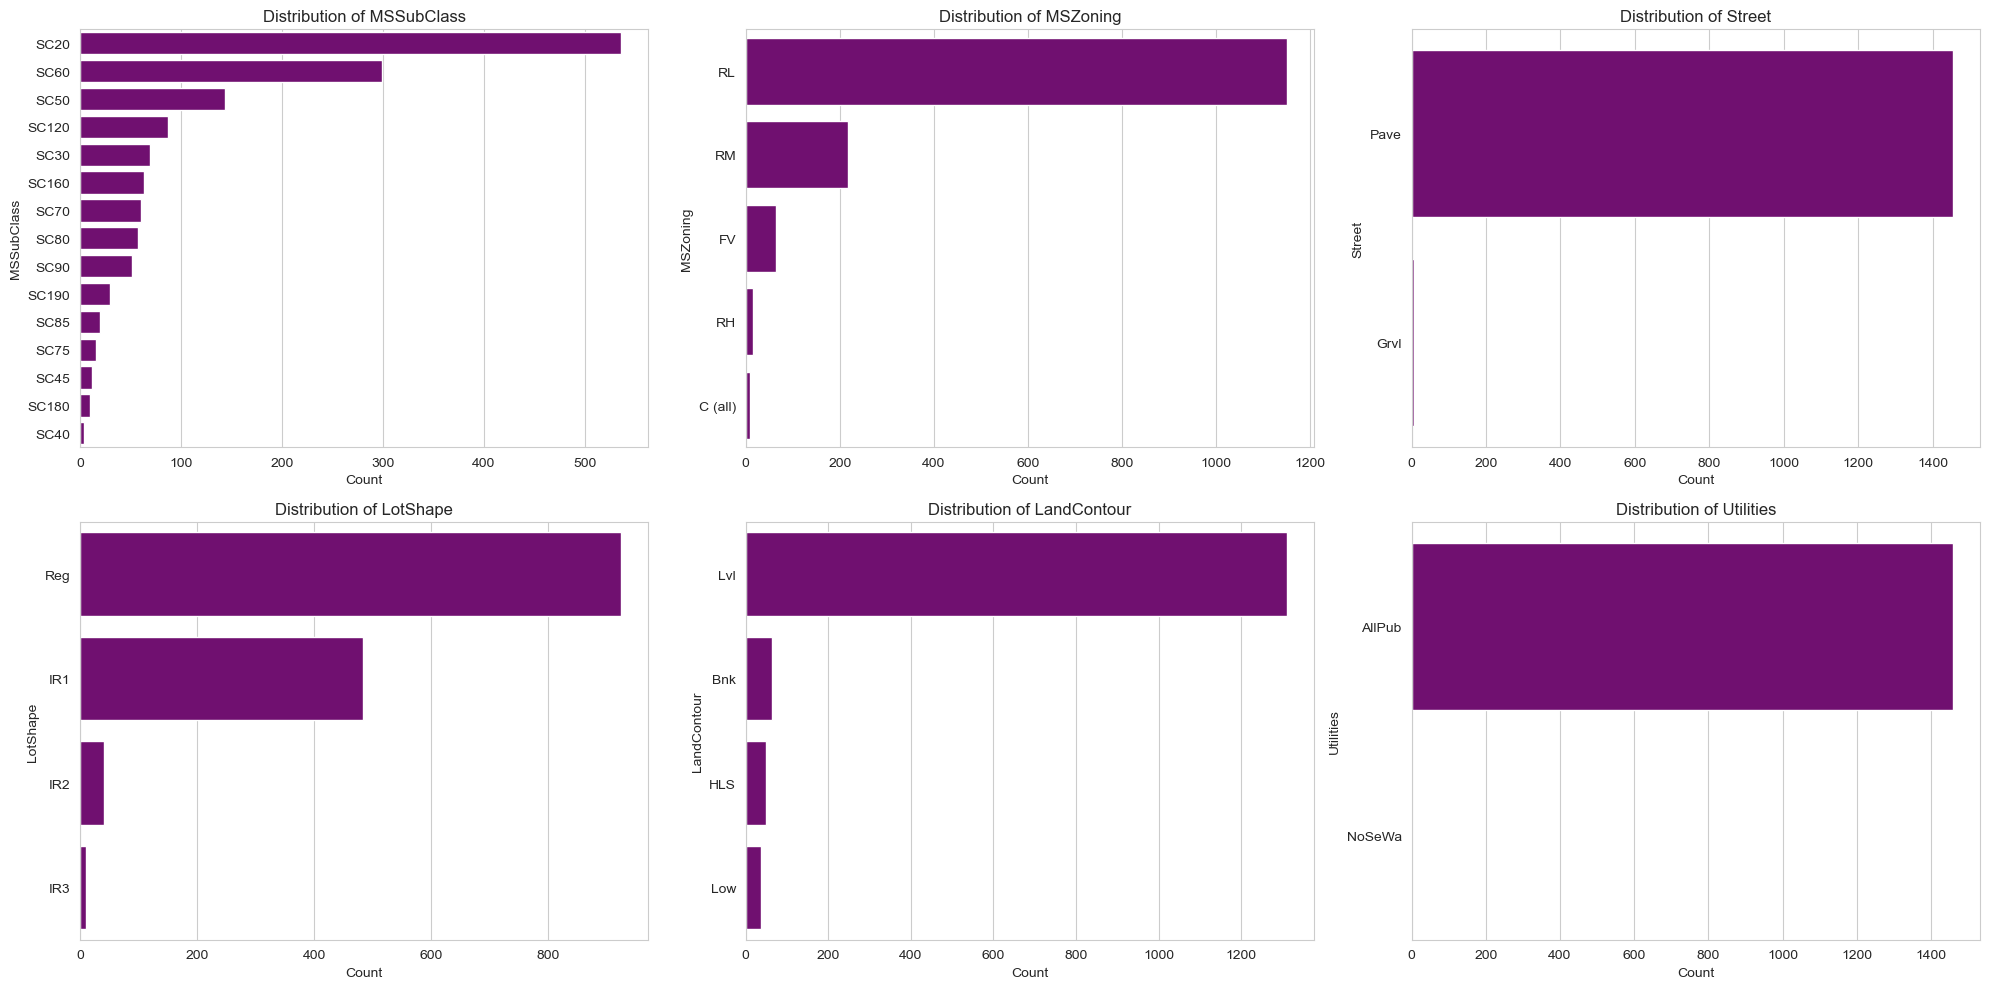

In [17]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.countplot(y=df_cleaned[col], color="purple", order=df_cleaned[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()

## Insights

##### 1. MSSubClass 
* Most common: 20 (1-STORY 1946+ homes).
* Next popular: 60 (2-STORY 1946+ homes) and 50 (1.5-STORY finished).
* Less common: older or non-standard home styles (e.g., SC45, SC180).
* Indicates house type & age indirectly.
* Strong predictor for home structure and price.


##### 2. MSZoning 
* RL (Residential Low Density) dominates heavily.
* RM (Residential Medium Density) is the second most frequent.
* Other zones like FV, RH, C (commercial) are rare.
* Helps distinguish land use and value.

##### 3. Street 
* Nearly all properties have Paved (Pave) roads.
* Very few with Gravel (Grvl).
* Could be a minor but clear differentiator.
* May slightly affect property value or accessibility.
* Due to imbalance, low predictive power alone.

##### 4. LotShape 
* Majority are Reg (Regular-shaped lots).
* Somewhat common: IR1 (Slightly irregular).
* Rare types: IR2, IR3 (more irregular).
* Might influence usability of land and building area.

##### 5. LandContour 
* Most land is Lvl (Level) — very dominant.
* Minor variants: Bnk (Banked), HLS (Hillside), Low.
* Can affect drainage, construction cost, etc.
* Important in geographic/structural modeling.

##### 6. Utilities 
* Nearly all have AllPub (All public utilities).
* NoSeWa (No sewer/water) is extremely rare.
* Offers little variance — might be dropped.
* Not useful unless focusing on very rural/isolated areas.

### Step 4: Bivariate Analysis

##### 1. Advanced Scatter Plots with Regression Lines

In [18]:
corr_matrix = df_cleaned[numerical_cols].corr()
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(11).index[1:]

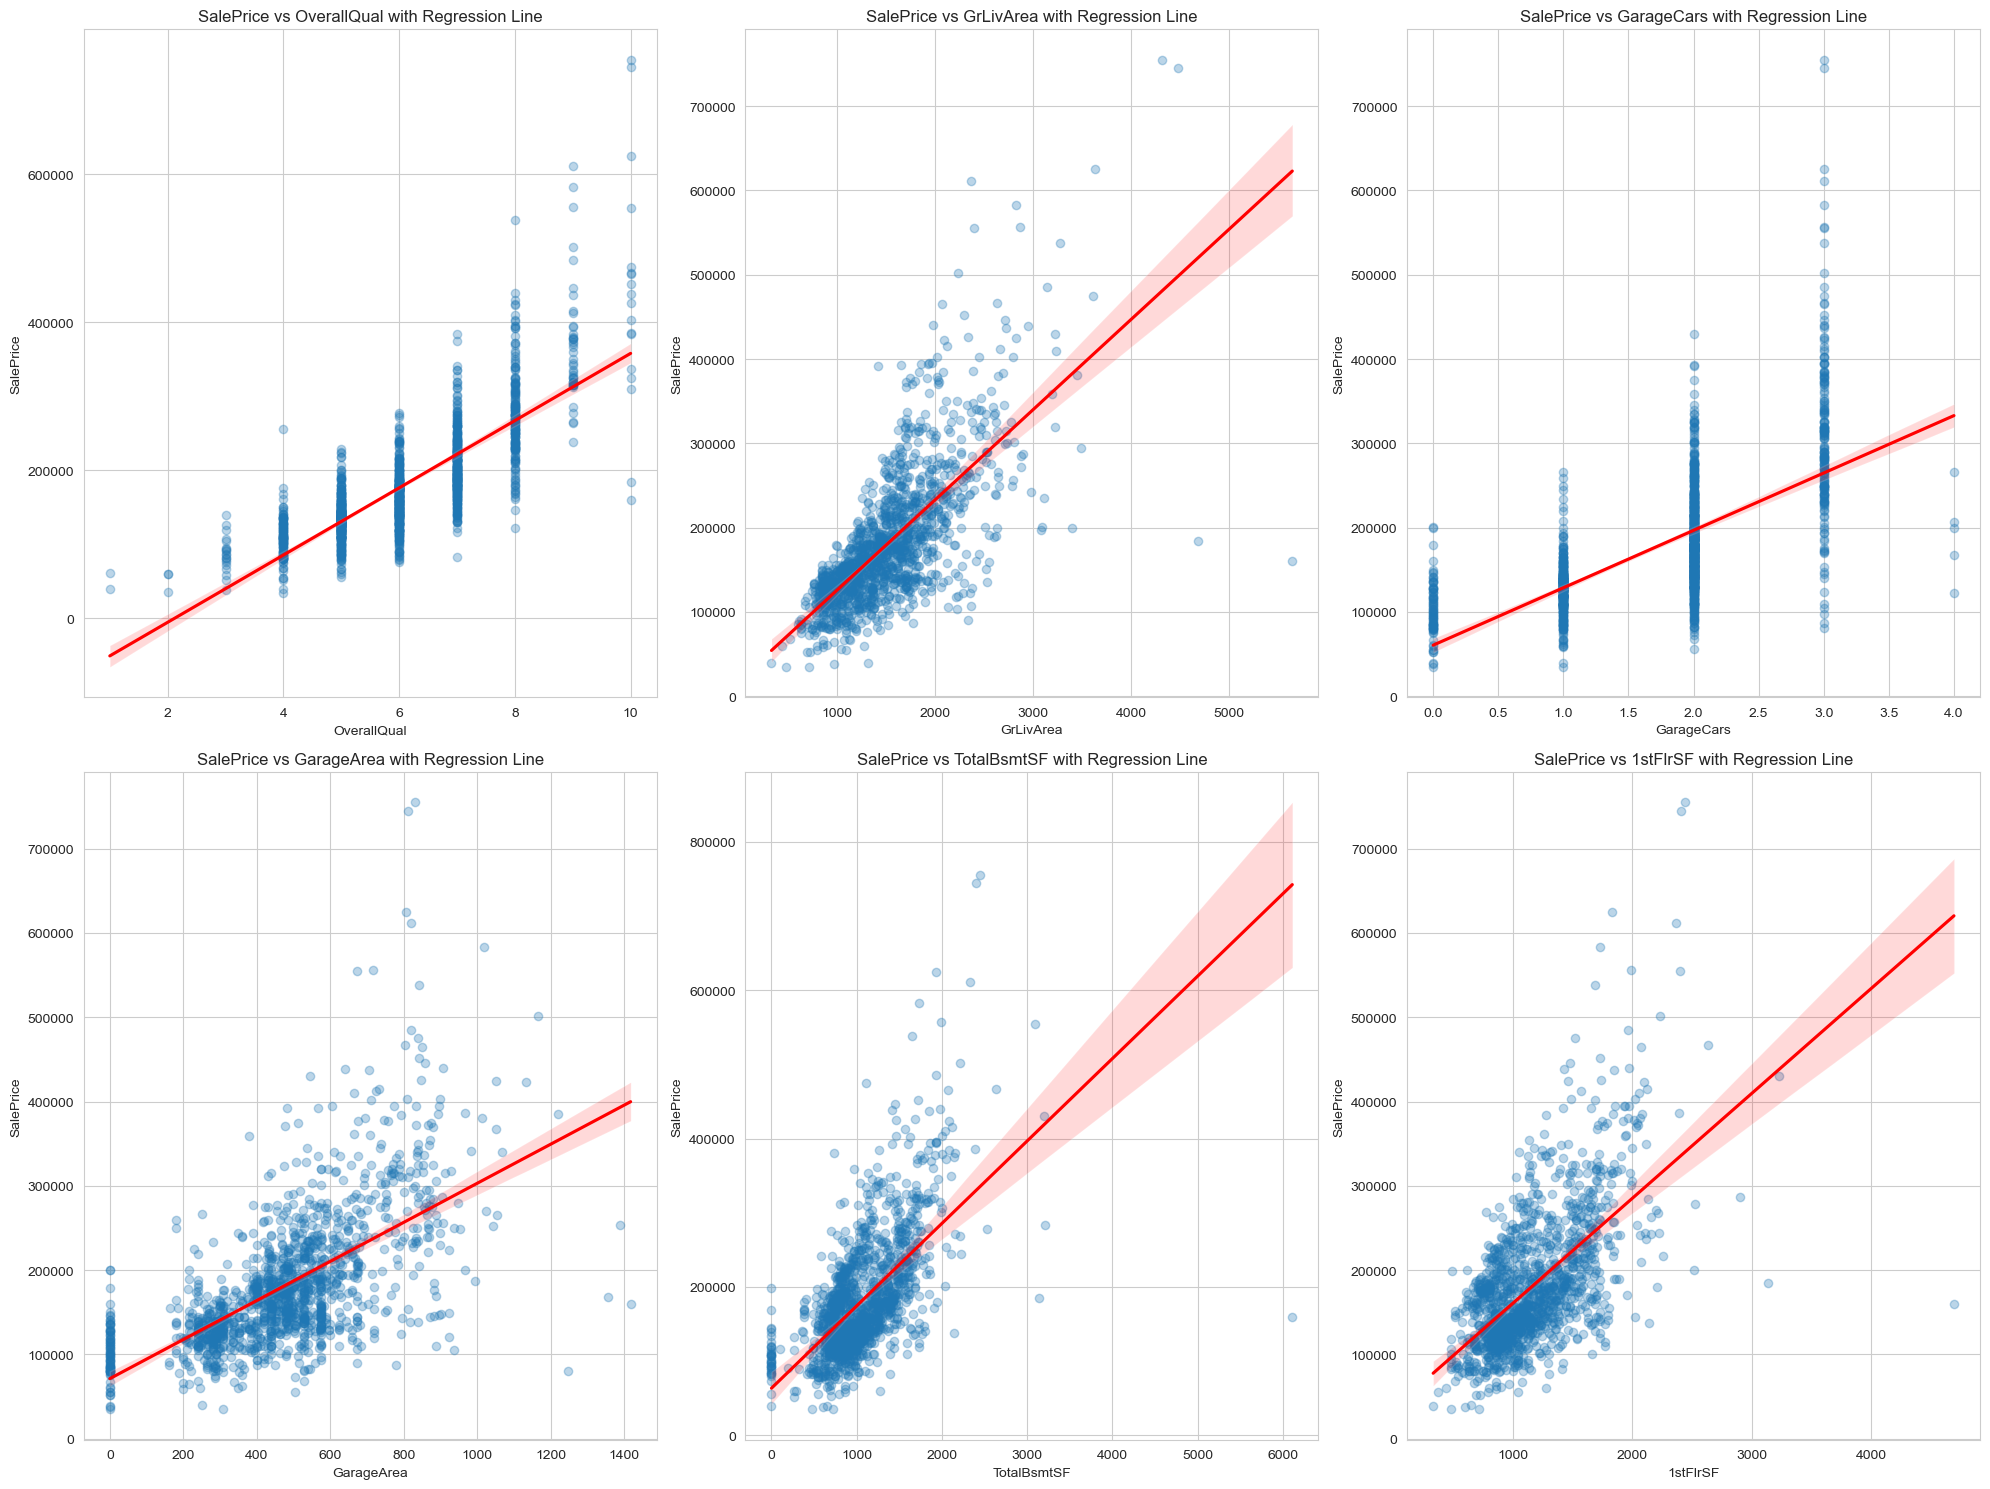

In [19]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_corr_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=feature, y='SalePrice', data=df_cleaned, 
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'SalePrice vs {feature} with Regression Line')
plt.tight_layout()
plt.show()

## Insights

##### 1. SalePrice vs OverallQual
* Strong positive linear relationship.
* Higher quality → significantly higher price.
* Clear upward trend, few outliers.
* One of the most important predictors.

##### 2. SalePrice vs GrLivArea
* Strong positive correlation.
* Larger living area → higher price.
* Some outliers (e.g., huge area but average price).
* Key feature for model accuracy.

##### 3. SalePrice vs GarageCars
* Positive step-like trend — more cars, more price.
* Price rises with garage capacity (0 to 4).
* Values mostly at 1, 2, or 3 — very few 4s.
* Good feature for ordinal encoding.
* Less linear than others but still valuable.

##### 4. SalePrice vs GarageArea
* Positive correlation — bigger garage, more price.
* Slight non-linearity and spread.
* Some large garages not tied to high prices (outliers).
* Good support to GarageCars.

##### 5. SalePrice vs TotalBsmtSF
* Clear positive trend.
* Bigger basements → higher prices.
* Similar pattern to GrLivArea.
* May need scaling or log transformation for better fit.
* Strong predictor, especially when combined with finished basement info.

##### 6. SalePrice vs 1stFlrSF
* Linear and consistent upward trend.
* Higher 1st floor area → higher price.
* Some outliers but not many.
* Similar to TotalBsmtSF in impact.

##### 2. Categorical vs Numerical - Grouped Analysis

In [20]:
cat_features = [col for col in df_cleaned.select_dtypes(include=['object']).columns 
                if df_cleaned[col].nunique() < 20]

cat_features += ['OverallQual', 'OverallCond']

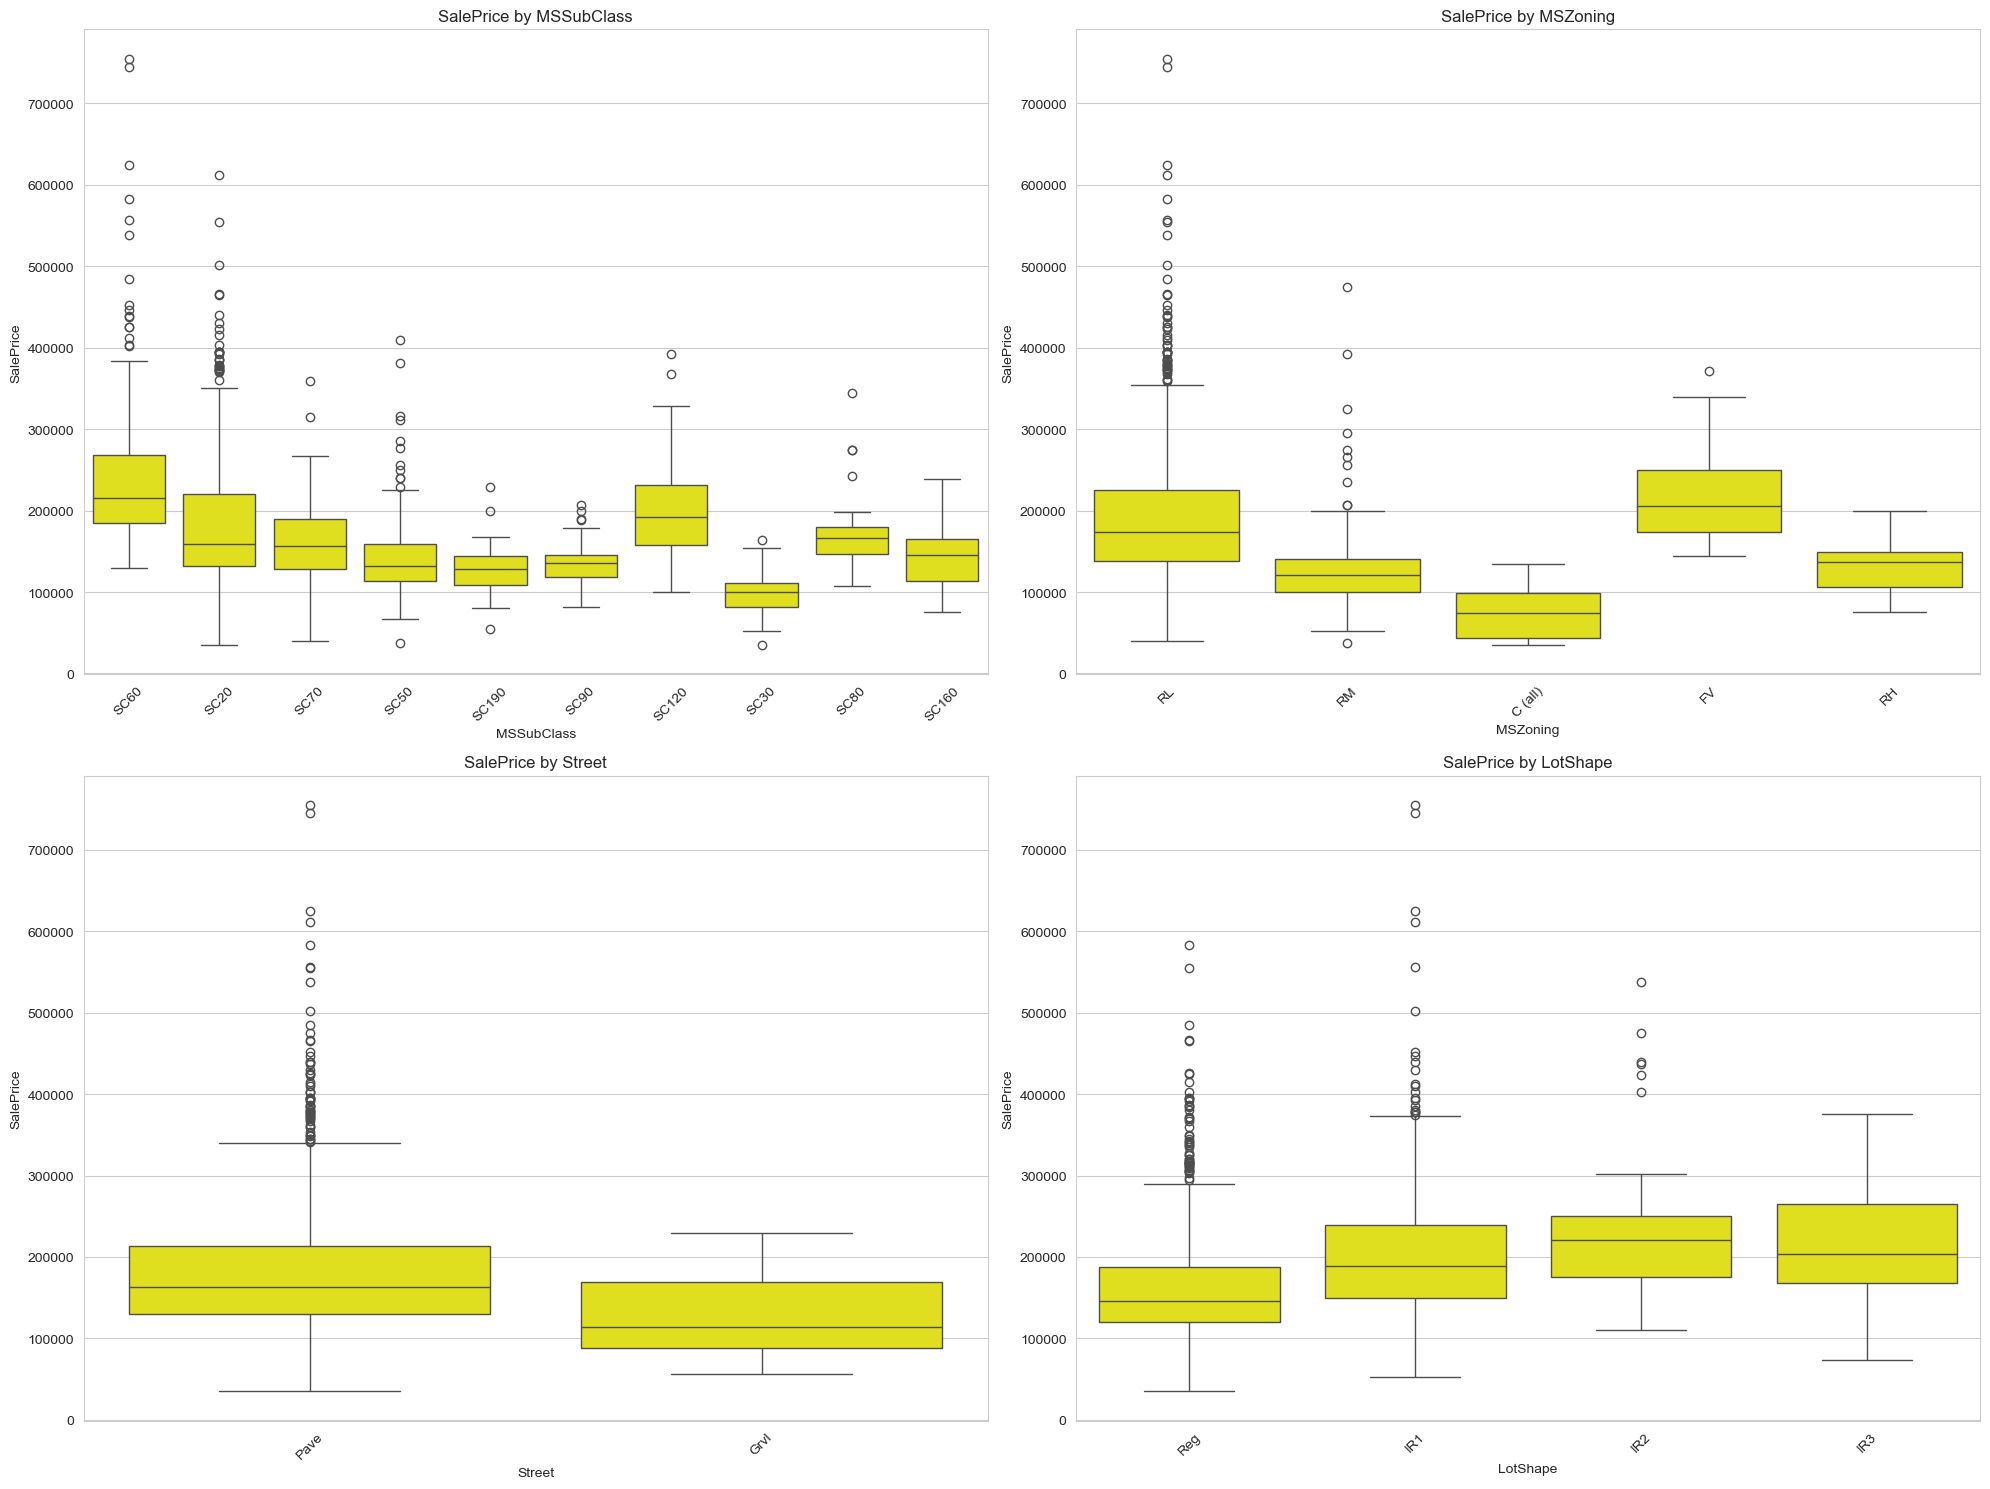

In [21]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(cat_features[:4]): 
    plt.subplot(2, 2, i+1)
    
    if df_cleaned[feature].nunique() > 10:
        top_cats = df_cleaned[feature].value_counts().nlargest(10).index
        data = df_cleaned[df_cleaned[feature].isin(top_cats)]
    else:
        data = df_cleaned
    
    sns.boxplot(x=feature, y='SalePrice', data=data, color="yellow")
    plt.title(f'SalePrice by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights

##### 1. SalePrice by MSSubClass
* Different classes show distinct price levels.
* 60 (2-story new homes) and 120 (1-story luxury homes) have higher medians.
* 30, 180, 190 show lower prices.
* Good indicator of house type and market segment.

##### 2. SalePrice by MSZoning
* RL (Residential Low Density) has the highest median price.
* RM (Medium Density) and C (Commercial) have lower prices.
* FV (Floating Village) also has high prices, though rare.
* Strong relationship between zoning and property value.

##### 3. SalePrice by Street
* Paved streets ("Pave") have higher prices than gravel ("Grvl").
* Huge price difference — paving adds value.
* Small number of gravel street homes.
* Can indicate infrastructure quality.

##### 4. SalePrice by LotShape
* Reg (Regular) lots have higher median prices.
* IR2 and IR3 (irregular) lots tend to be less valued.
* Slight variability within categories.
* Important for identifying lot usability.

##### 3. Interaction Effects - Price per SqFt by Quality

<Figure size 700x500 with 0 Axes>

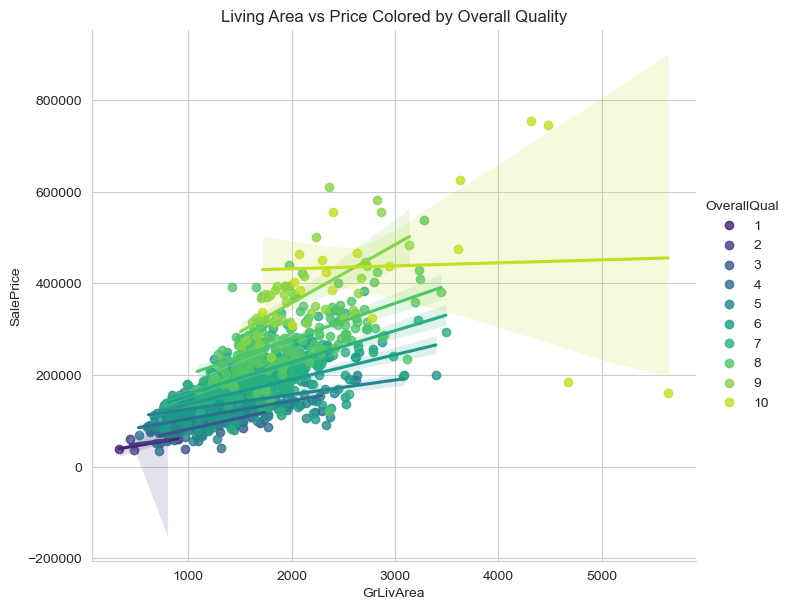

In [22]:
plt.figure(figsize=(7, 5))
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual', 
           data=df_cleaned, palette='viridis', height=6, aspect=1.2)
plt.title('Living Area vs Price Colored by Overall Quality')
plt.show()

## Insights

##### GrLivArea (Above Ground Living Area) vs SalePrice with OverallQual Coloring
* Strong positive correlation: As GrLivArea increases, SalePrice generally increases too.
* Lighter colors (high OverallQual) cluster at higher prices.
* Darker colors (low OverallQual) mostly stay at lower prices, even for bigger houses.
*  A small house with OverallQual = 9 or 10 can cost more than a big house with OverallQual = 3 or 4.
*  A few very large homes (>4000 sqft) with lower-than-expected prices might be outliers or custom builds.
*  GrLivArea and OverallQual together are strong predictors of price.

##### 4. Create PriceSegment if not already created

In [23]:
if 'PriceSegment' not in df_cleaned.columns:
    df_cleaned['PriceSegment'] = pd.qcut(df_cleaned['SalePrice'], q=4, 
                                        labels=['Low', 'Medium', 'High', 'Premium'])

# Cross-tabulation Analysis for Two Categorical Variables
if 'OverallQual' in df_cleaned.columns:
    cross_tab = pd.crosstab(df_cleaned['PriceSegment'], df_cleaned['OverallQual'], 
                           normalize='index')

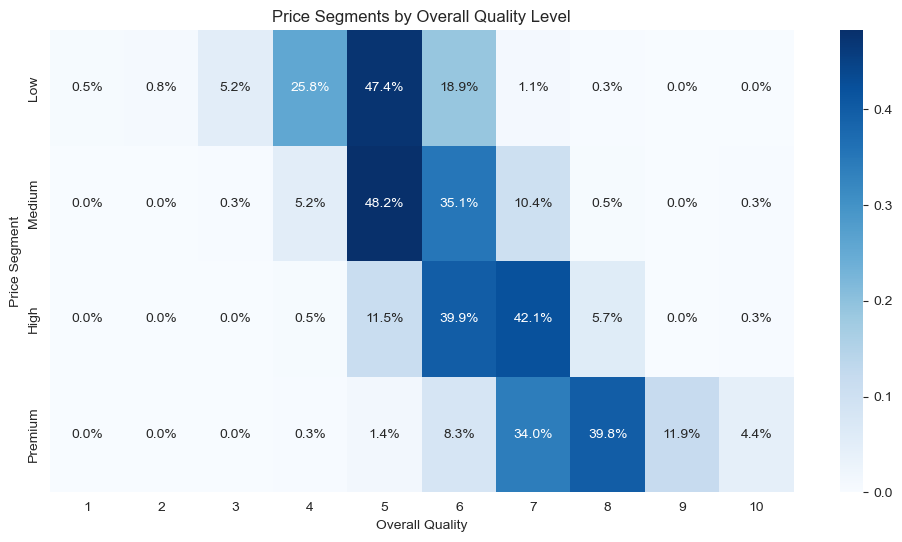

In [24]:
 plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='.1%', cmap='Blues')
plt.title('Price Segments by Overall Quality Level')
plt.ylabel('Price Segment')
plt.xlabel('Overall Quality')
plt.show()

## Insights

##### Heatmap Analysis: Price Segments vs Overall Quality
* Most houses fall in OverallQual = 5 or 6, forming the core of the dataset.
* These are mostly in Low and Medium price segments.
* 47.4% of low-price homes are quality 5.
* Very few low-price homes have quality >7.
* OverallQual 8 and 9 dominate the Premium segment (39.8% and 11.9%).
* These homes rarely appear in low/medium price bands.
* It’s spread across Medium, High, and Premium, showing it's a transition quality.
* 42.1% of High-price homes are Quality 7.
* 39.9% of high-price homes are Quality 6 – the minimum level reaching into high price.

##### 5. Time-based Bivariate Analysis

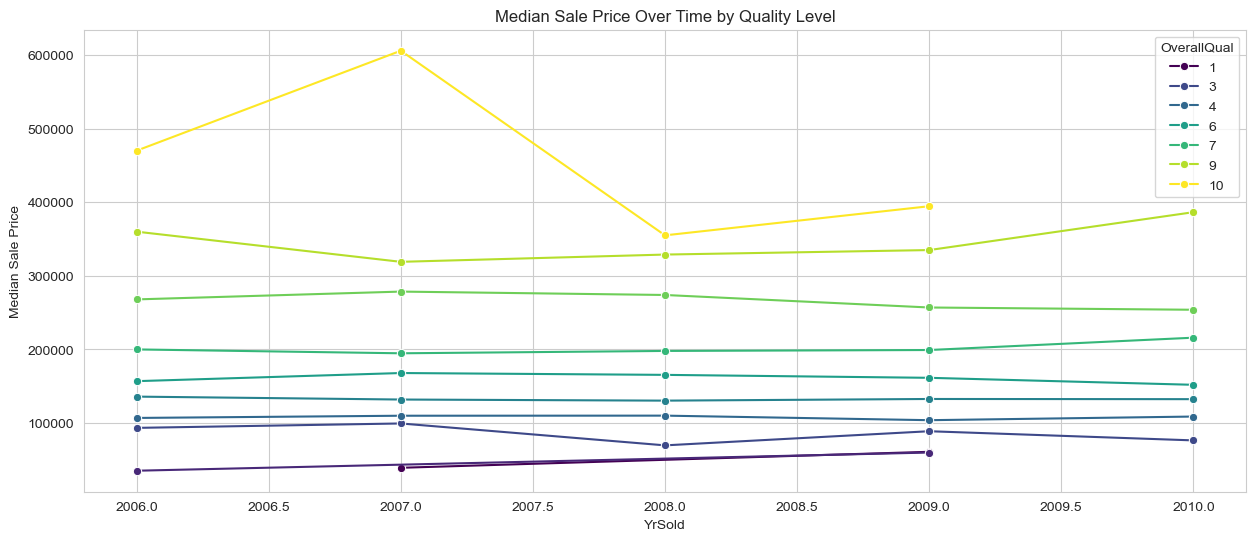

In [25]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='YrSold', y='SalePrice', hue='OverallQual', 
             data=df_cleaned, estimator='median', errorbar=None,
             palette='viridis', marker='o')
plt.title('Median Sale Price Over Time by Quality Level')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.show()

## Insights

### Line Plot Analysis: Median Sale Price Trends by Overall Quality

##### 1. Quality correlates directly with price:
* Higher OverallQual → consistently higher median sale prices.
* OverallQual 10 peaked at 600K in 2007 — the highest across all years.

##### 2. 2008 housing crisis impact:
* All quality levels show a dip in 2008, reflecting market conditions.
* Quality 10 saw the sharpest drop (from ~600K to ~350K).

##### 3. Post-crisis recovery trend:
* From 2009–2010, all quality levels show slight recovery or stabilization.
* Especially clear for OverallQual 10 and 9.

##### 4. Stability in mid-range quality:
* Qualities 4–6 had minimal fluctuations (~150K–250K).
* These properties were more resilient to market shocks.

##### 5. Low-quality homes saw least price growth:
* OverallQual 1 & 3 remained flat, below 150K across all years.
* Barely affected by the crisis — demand/supply may have stayed steady.

##### 6. Quality 7–9 homes followed similar paths:
* Saw moderate peak in 2007, dip in 2008, and steady climb after.

##### 7. Visualization confirms:
* OverallQual is one of the strongest predictors of house price.
* Also a valuable feature for time-series or segmented forecasting.

##### 6. Advanced Correlation Analysis with Conditional Plots

<Figure size 1200x800 with 0 Axes>

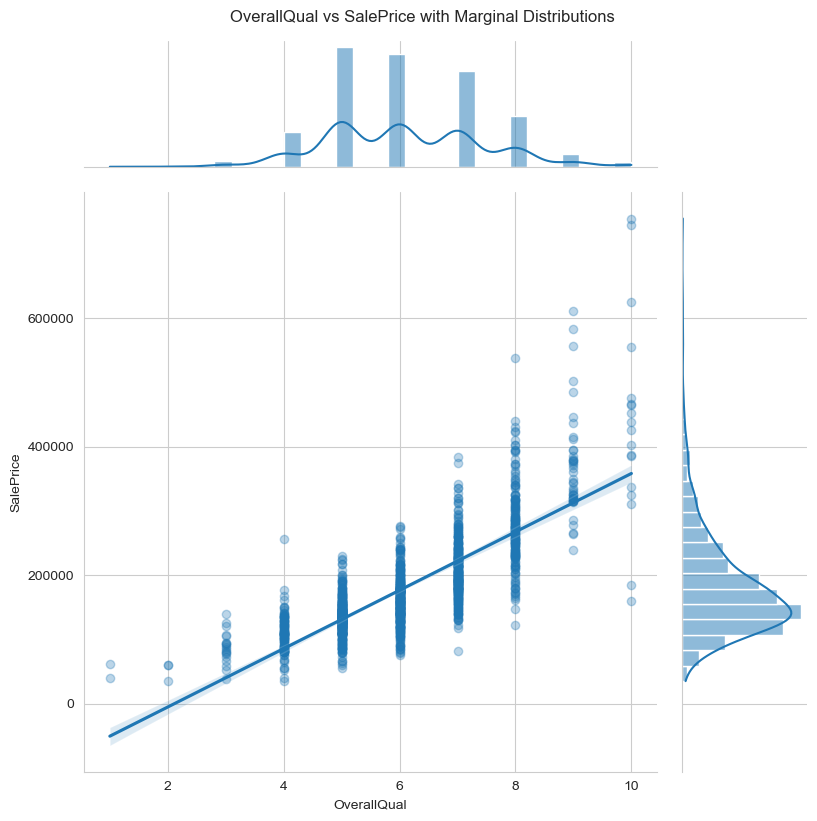

In [26]:
feature = top_corr_features[0]

plt.figure(figsize=(12, 8))
sns.jointplot(x=feature, y='SalePrice', data=df_cleaned,
              kind='reg', height=8, ratio=4,
              joint_kws={'scatter_kws': {'alpha': 0.3}},
              marginal_kws={'bins': 30})
plt.suptitle(f'{feature} vs SalePrice with Marginal Distributions', y=1.02)
plt.show()

## Insights

### OverallQual vs SalePrice with Marginals

##### 1. Strong positive linear correlation:
* As OverallQual increases, SalePrice also increases.
* Trend line shows a clear linear upward pattern.

##### 2. Distribution of Quality Scores (Top Histogram):
* Most houses are rated between 5 and 7.
* Peak is at OverallQual = 5 and 6, suggesting these are the most common builds.

##### 3. Price Distribution (Right Histogram):
* Sale prices are right-skewed (more lower-priced houses).
* Majority of homes fall under 200K–250K.

##### 4. Spread increases with quality:
* Higher quality homes (8–10) show wider spread in prices.
* This implies more variability in luxury properties — possibly due to size, location, or custom features.

##### 5. Outliers present at high prices:
* Some homes priced above $600K even for Quality 9–10
* These are likely luxury or custom-built homes.

##### 6. Few low-quality homes:
* Very few data points for OverallQual 1–2.
* Might indicate either poor-quality homes are rare or excluded.

##### 7. Pairwise Correlation Heatmap of Top Features

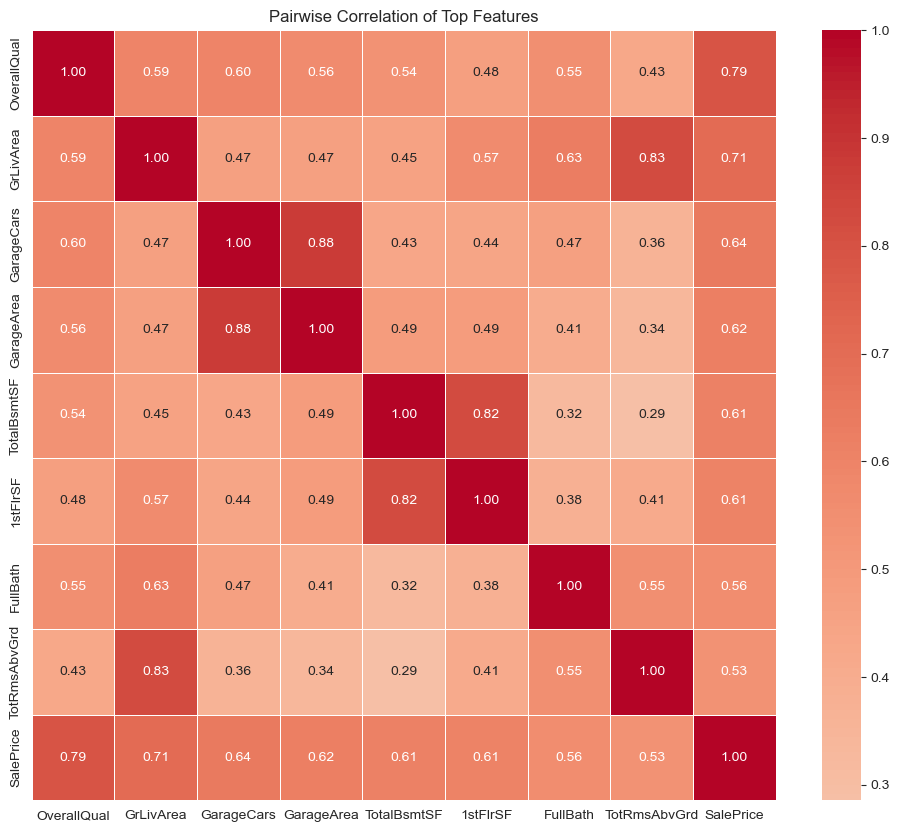

In [27]:
top_features = list(top_corr_features[:8]) + ['SalePrice']  # Top 8 features + target

plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned[top_features].corr(), annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation of Top Features')
plt.show()

## Insights

### Pairwise Correlation of Top Features

##### 1. OverallQual strongly correlates with SalePrice (0.79): 
* Higher overall quality of the house is a strong indicator of a higher sale price.
  
##### 2. GrLivArea shows a substantial positive correlation with SalePrice (0.71): 
* Larger living area above ground is associated with higher sale prices.
  
##### 3. GarageCars and GarageArea are highly correlated (0.89): 
* The number of cars the garage can hold is strongly related to the garage's size.
  
##### 4. TotalBsmtSF has a strong positive correlation with SalePrice (0.61): 
* Larger total basement square footage tends to lead to higher sale prices.
  
##### 5. 1stFlrSF and TotalBsmtSF show a high correlation (0.82): 
* The size of the first floor is closely related to the total basement size.

##### 6. Fireplaces has a moderate positive correlation with SalePrice (0.47): 
* The presence of more fireplaces is generally associated with a higher sale price.

##### 7. There is relatively low correlation among some features: 
* For example, the correlation between OverallQual and GarageCars (0.6) is positive but not as strong as some other pairs, suggesting they capture somewhat different aspects of the property.

### Step 5: Multivariate Analysis

Investigate relationships between multiple variables, especially those impacting house prices.

##### 1. Top 10 features correlated with SalePrice

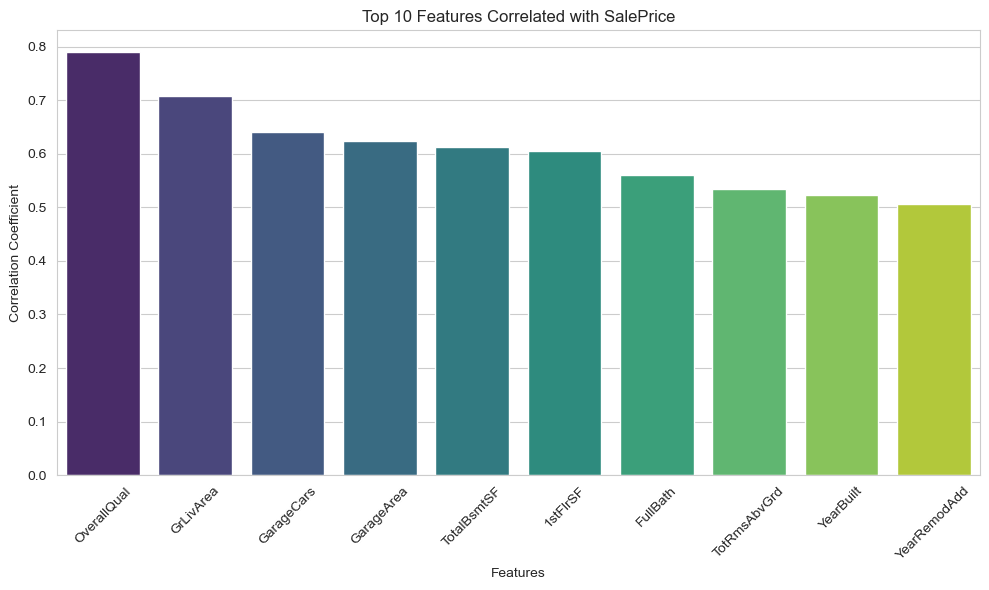

In [28]:
# Calculate correlation with SalePrice
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.index, y=top_corr.values, hue=top_corr.index, palette='viridis', legend=False)
plt.title('Top 10 Features Correlated with SalePrice')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## Insights

### top 10 features with SalePrice
* OverallQual has the strongest positive correlation with SalePrice. This suggests that the overall quality of the house is the most influential factor in determining its sale price.
* GrLivArea (Above ground living area) is the second most positively correlated feature. Larger living space tends to lead to higher sale prices.
* GarageCars and GarageArea show strong positive correlations. The size and capacity of the garage are important factors for sale price.
* TotalBsmtSF (Total basement square feet) also has a substantial positive correlation. A larger basement size is associated with higher sale prices.
* The top 5 features (OverallQual to TotalBsmtSF) exhibit relatively high and similar positive correlations. These are key drivers of sale price.
* The correlation coefficients gradually decrease from OverallQual to YearRemodAdd. This indicates a decreasing level of influence on SalePrice as we move towards the right of the plot.
* YearBuilt and YearRemodAdd have the weakest positive correlations among the top 10. While still positively correlated, the original construction year and remodel year have a less direct impact compared to quality and size-related features.

##### 2. Scatter plots of top correlated features with SalePrice

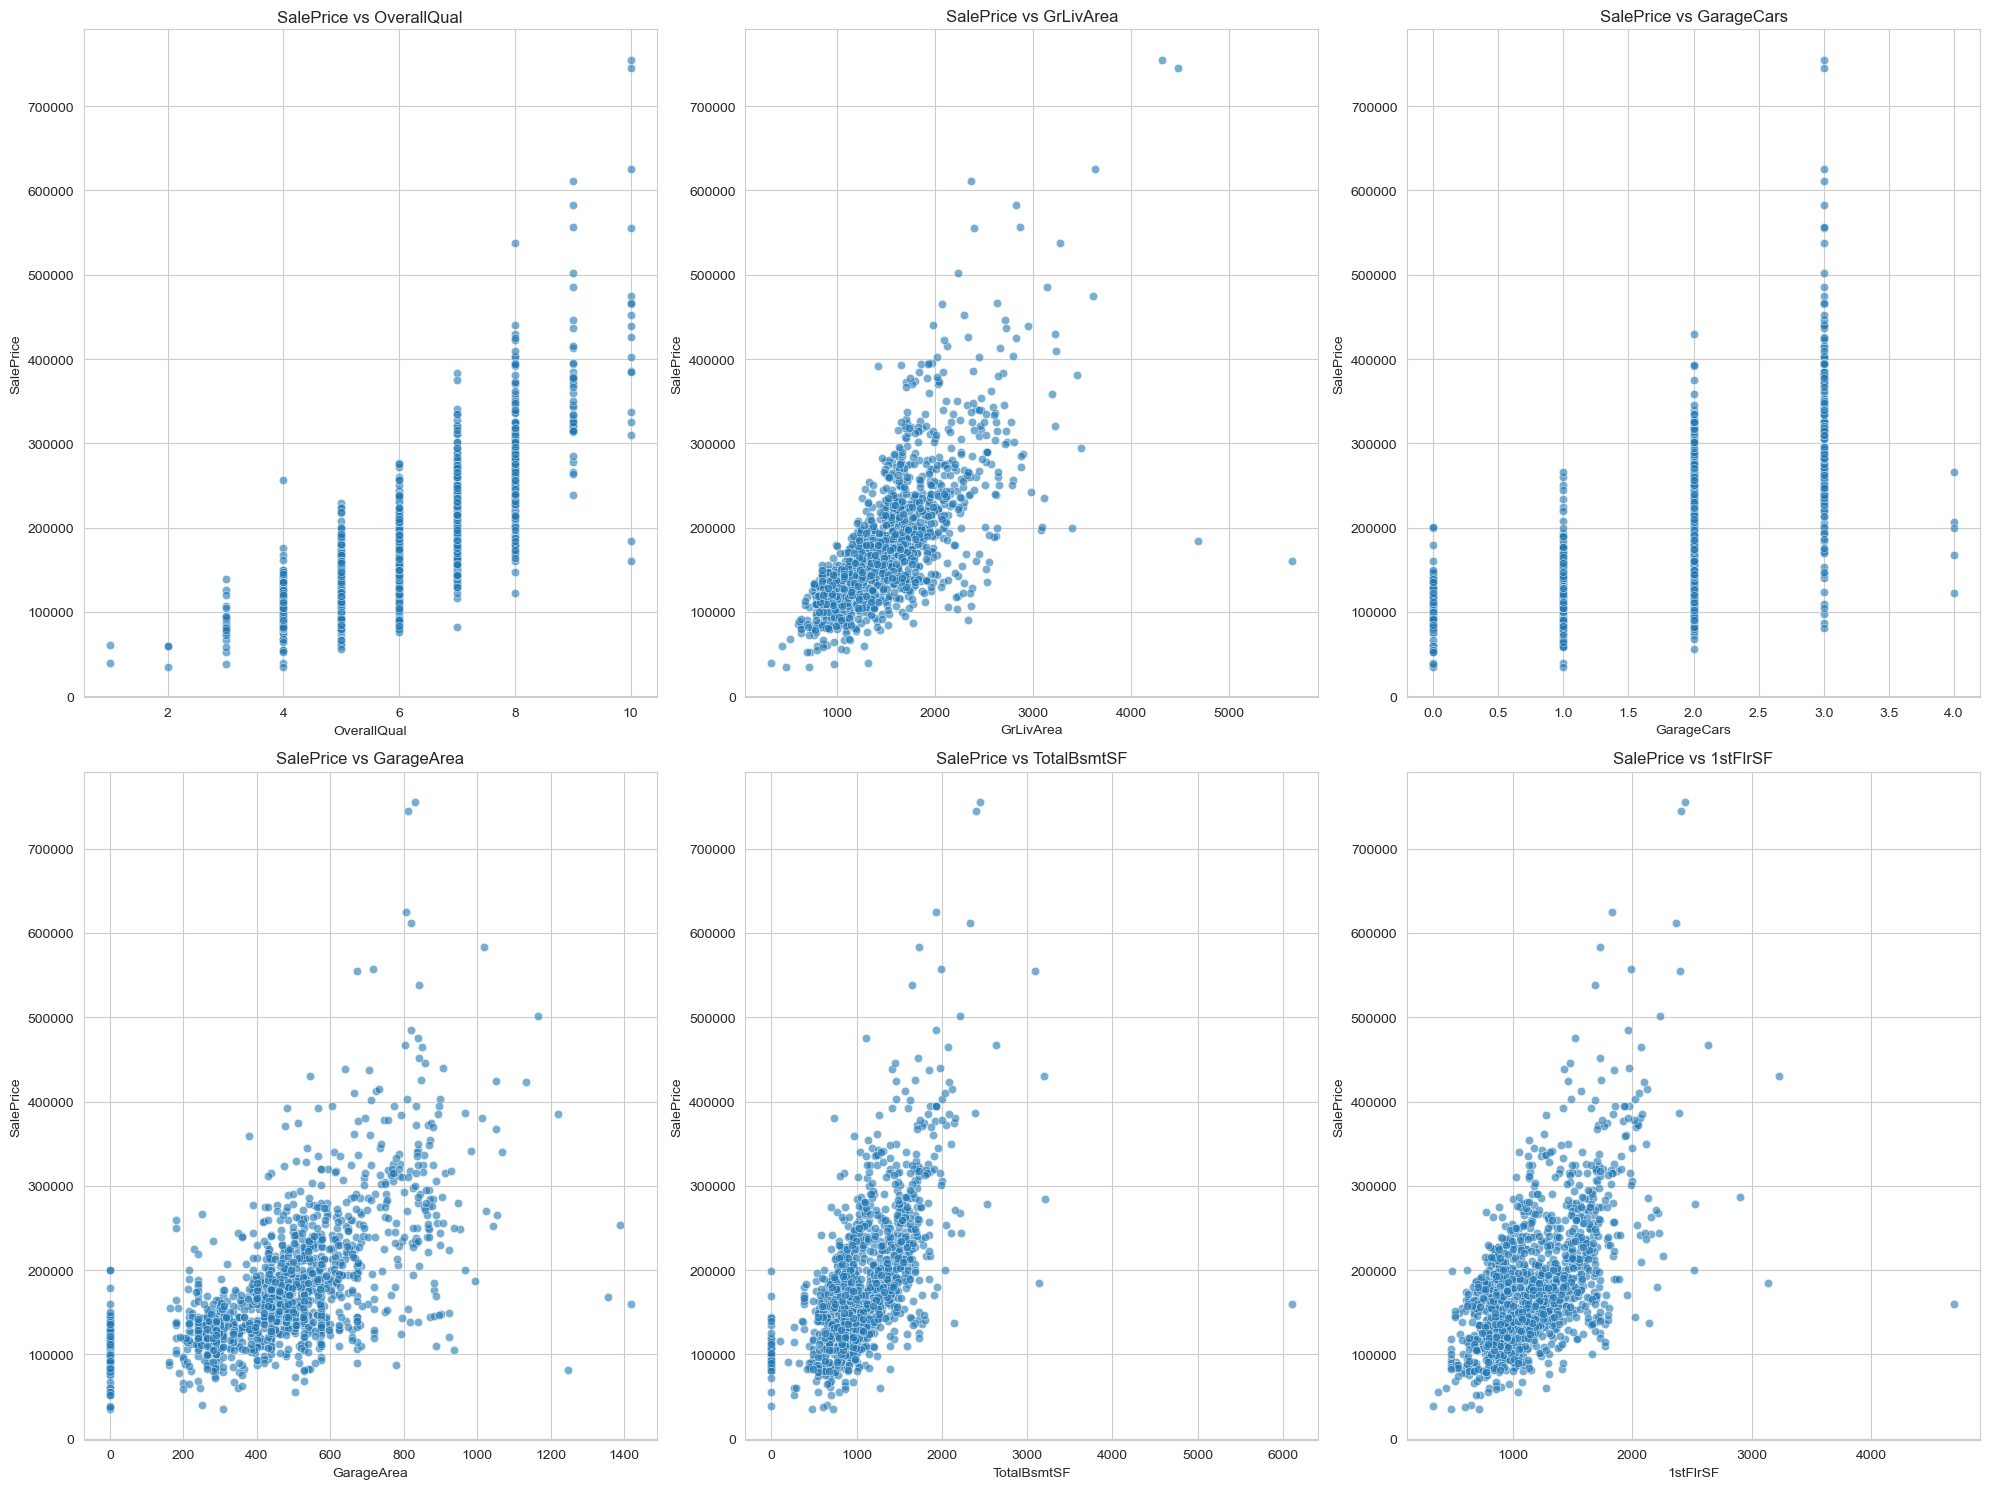

In [29]:
top_features = top_corr.index[:6]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['SalePrice'], alpha=0.6)
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

## Insights

##### 1.  Positive correlation between GrLivArea and SalePrice:
* As the ground living area increases, the sale price tends to increase.

##### 2. Positive correlation between TotalBsmtSF and SalePrice: 
* Larger total basement square footage is generally associated with higher sale prices.

##### 3. Discrete SalePrice jumps with GarageCars: 
* SalePrice tends to form distinct levels based on the number of cars the garage can hold (0, 1, 2, 3, 4).

##### 4. Positive correlation between 1stFlrSF and SalePrice: 
* Larger first-floor square footage generally corresponds to higher sale prices.

##### 5. Positive correlation between GarageArea and SalePrice with potential saturation: 
* While larger garage area tends to increase sale price, the effect might diminish at very large garage sizes.

##### 3. Pairplot of top features

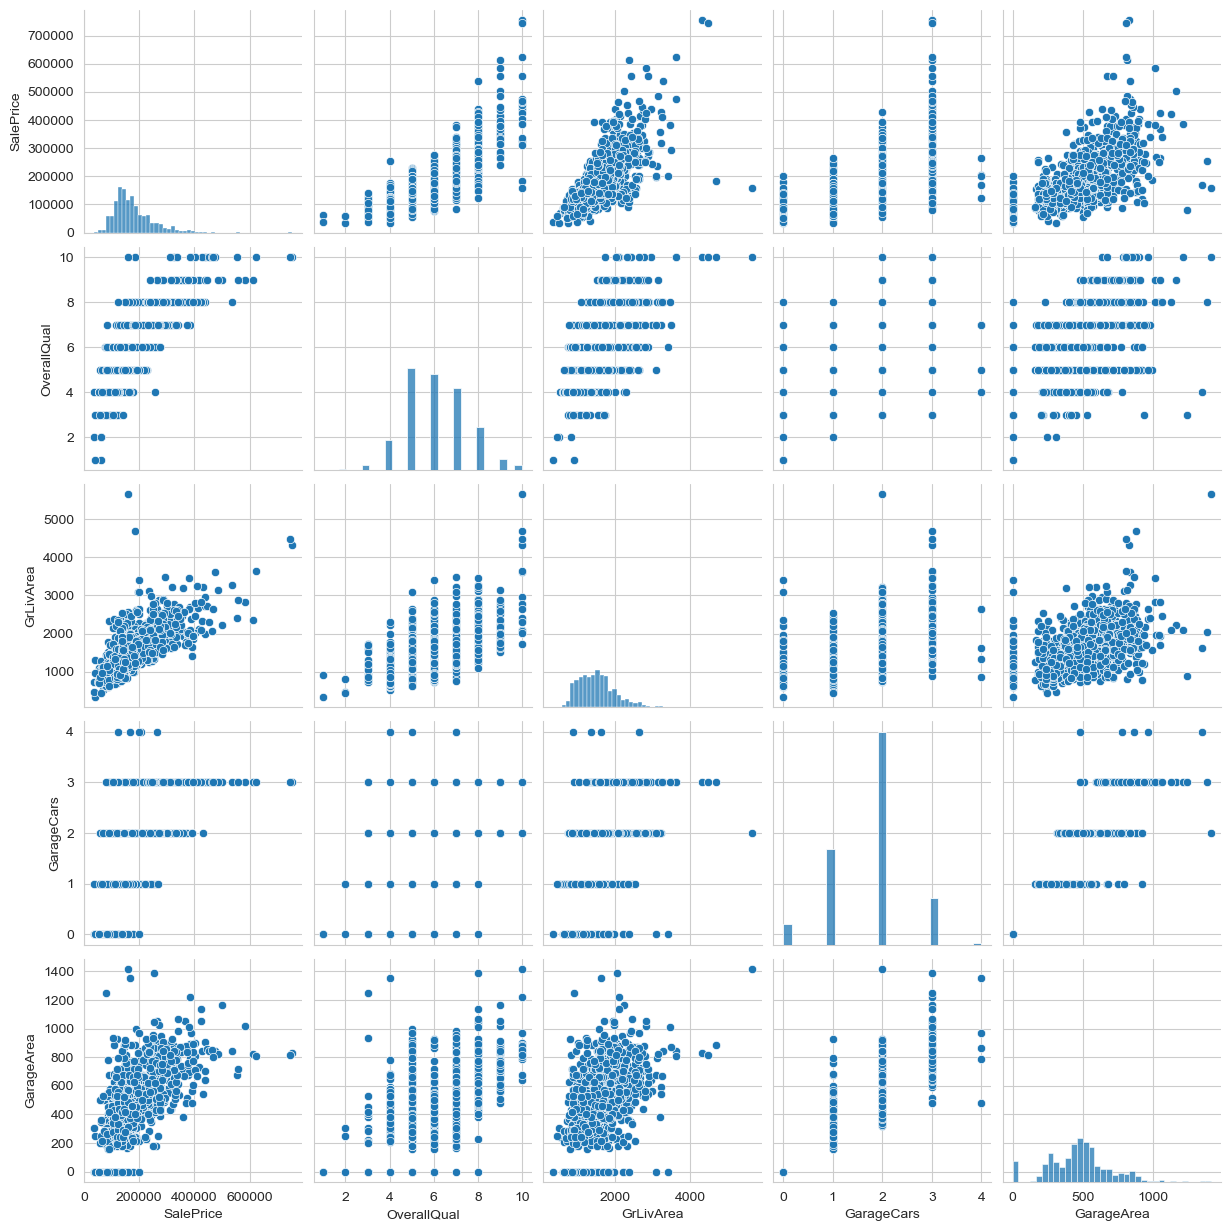

In [30]:
sns.pairplot(df_cleaned[['SalePrice'] + list(top_features[:4])])
plt.show()

## Insights

##### 1. Strong Positive Correlation between GrLivArea and SalePrice: 
* As the above ground living area increases, the sale price tends to increase significantly, showing a clear upward trend.

##### 2. Positive Correlation between TotalBsmtSF and SalePrice:
* Similar to living area, a larger total basement square footage is generally associated with a higher sale price.

##### 3. Positive Correlation between GarageCars and SalePrice: 
* The number of cars the garage can accommodate shows a positive relationship with sale price, although there are discrete price jumps for each additional car capacity.

##### 4. Positive Correlation between OverallQual and SalePrice (Categorical): 
* As the overall quality rating increases (on an ordinal scale), the sale price tends to be notably higher, with distinct price ranges for each quality level.

##### 5. Varied Spread in SalePrice for Different Features: 
* The scatter plots show different levels of price variation for different features. For instance, the SalePrice for a given GrLivArea has a wider spread than the SalePrice for a specific OverallQual rating.

### Step 6: Feature Engineering

Create new features that capture relevant information for pricing analysis.

In [31]:
df_cleaned['Price_per_sqft'] = df_cleaned['SalePrice'] / df_cleaned['GrLivArea']
df_cleaned['TotalSF'] = df_cleaned['TotalBsmtSF'] + df_cleaned['1stFlrSF'] + df_cleaned['2ndFlrSF']
df_cleaned['TotalBath'] = df_cleaned['FullBath'] + (0.5 * df_cleaned['HalfBath']) + df_cleaned['BsmtFullBath'] + (0.5 * df_cleaned['BsmtHalfBath'])
df_cleaned['HouseAge'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']
df_cleaned['RemodAge'] = df_cleaned['YrSold'] - df_cleaned['YearRemodAdd']
df_cleaned['Is_Luxury_Home'] = (df_cleaned['SalePrice'] > df_cleaned['SalePrice'].quantile(0.90)).astype(int)

In [32]:
# Amenity flags
df_cleaned['HasPool'] = df_cleaned['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_cleaned['HasFireplace'] = df_cleaned['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_cleaned['HasGarage'] = df_cleaned['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_cleaned['HasBsmt'] = df_cleaned['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

### Display new features

In [33]:
display(df_cleaned[['Price_per_sqft', 'TotalSF', 'TotalBath', 'HouseAge', 'RemodAge', 'Is_Luxury_Home']].head())

,Price_per_sqft,TotalSF,TotalBath,HouseAge,RemodAge,Is_Luxury_Home
0,121.929825,2566,3.5,5,5,0
1,143.819334,2524,2.5,31,31,0
2,125.139978,2706,3.5,7,6,0
3,81.537566,2473,2.0,91,36,0
4,113.739763,3343,3.5,8,8,0


### 7. Feature Engineering and Size Impact

Analyze the impact of features and size on house prices.

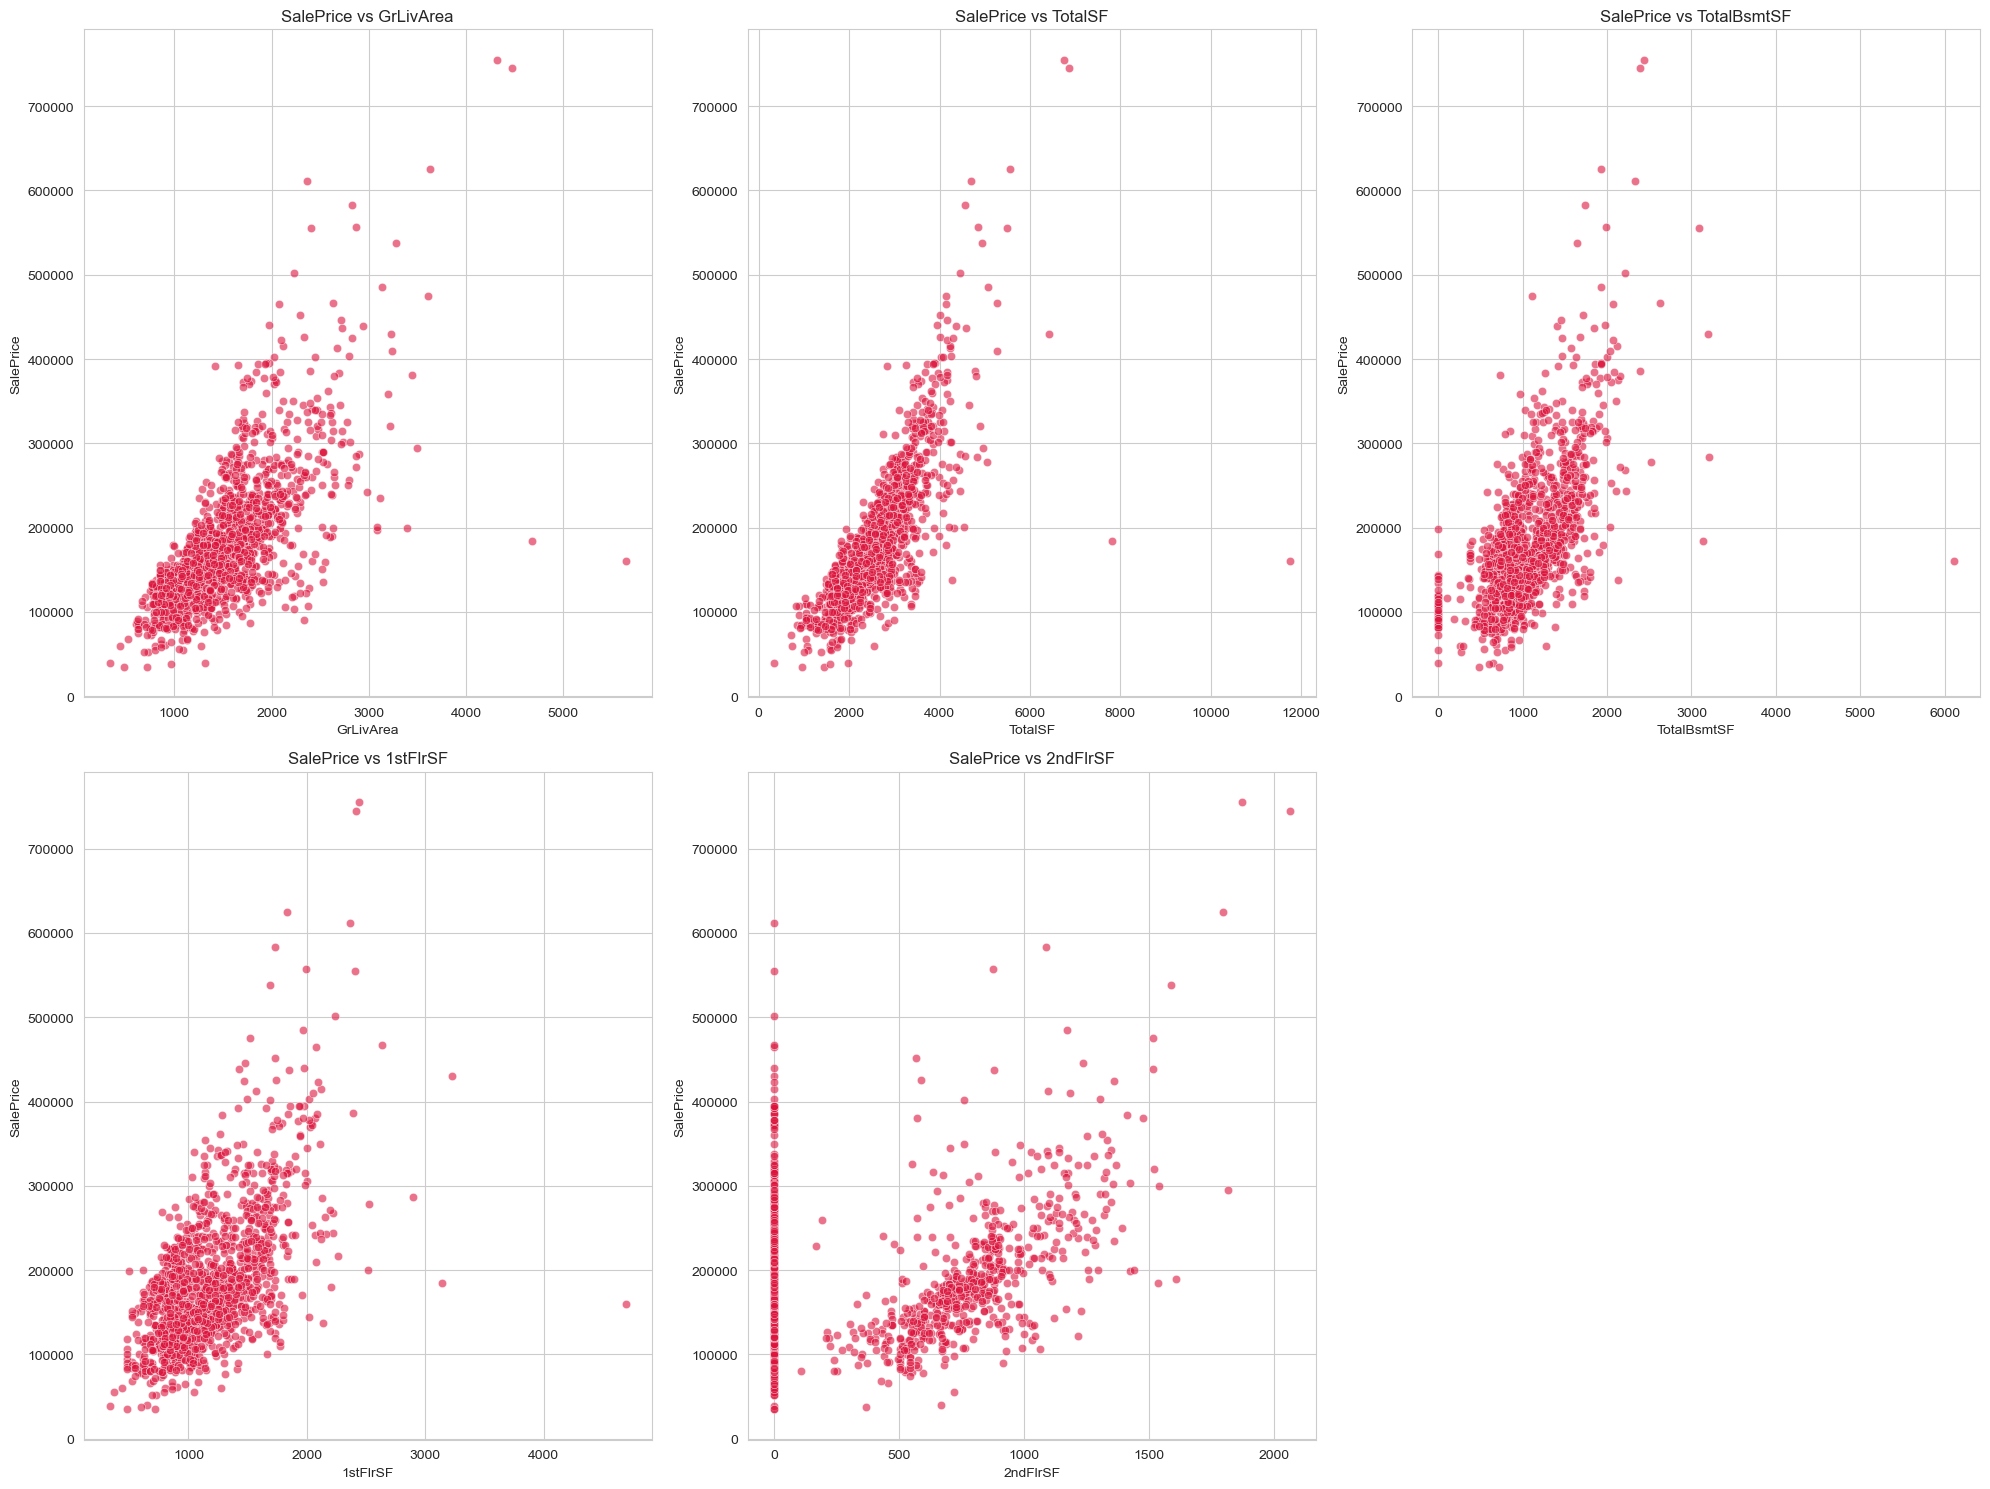

In [34]:
# Size impact analysis
size_features = ['GrLivArea', 'TotalSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(size_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['SalePrice'], alpha=0.6, color="crimson")
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

## Insights

##### 1. Strong Positive Linear Relationship between GrLivArea and SalePrice: 
* The plot shows a clear upward trend, indicating that as the above ground living area increases, the sale price tends to increase linearly and significantly.

##### 2. Positive Correlation between TotalBsmtSF and SalePrice with Potential Non-Linearity: 
* There's a general positive trend, but the spread of sale prices appears to widen at higher basement square footage, suggesting a potentially less strictly linear relationship compared to living area.

##### 3. Discrete Price Jumps Based on GarageCars: 
* The SalePrice shows distinct clusters corresponding to the number of cars the garage can hold (e.g., 1, 2, 3 car garages), with increasing median price for higher capacity.

##### 4. Clear Positive Correlation between 1stFlrSF and SalePrice: 
* Similar to the total basement square footage and living area, a larger first-floor square footage is associated with higher sale prices.

##### 5. Positive Correlation between GarageArea and SalePrice with Saturation: 
* The plot shows a positive correlation, but the increase in SalePrice appears to level off at higher GarageArea values, suggesting diminishing returns beyond a certain garage size.

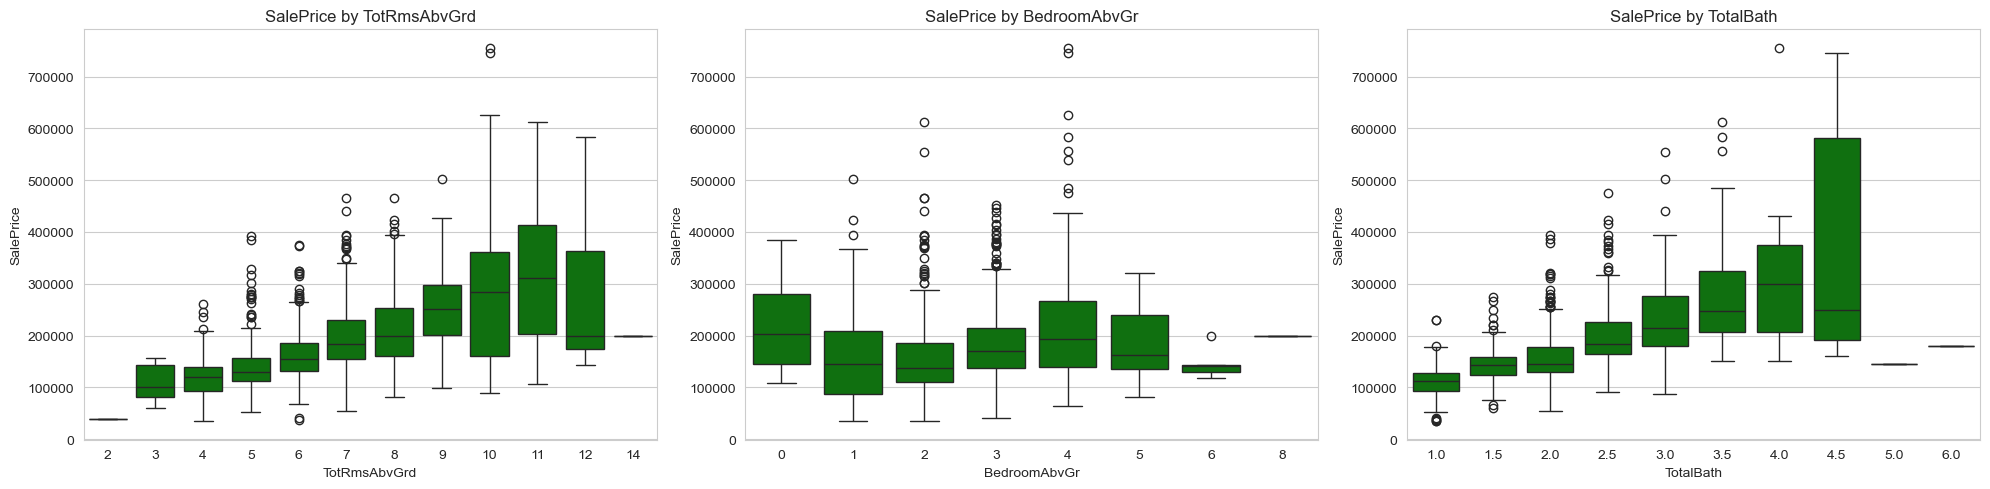

In [35]:
# Room and bathroom analysis
room_features = ['TotRmsAbvGrd', 'BedroomAbvGr', 'TotalBath']

plt.figure(figsize=(20, 5))
for i, feature in enumerate(room_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_cleaned[feature], y=df_cleaned['SalePrice'], color="green")
    plt.title(f'SalePrice by {feature}')
plt.tight_layout()
plt.show()

## Insights

##### 1. SalePrice generally increases with the number of BedroomsAbvGr: 
* There's a clear upward trend in the median SalePrice as the number of above-ground bedrooms increases, suggesting more bedrooms are associated with higher property values.

##### 2. SalePrice also tends to increase with the number of FullBath: 
* Similar to bedrooms, a higher number of full bathrooms generally corresponds to a higher median SalePrice.

##### 3. TotalBath shows the strongest positive association with SalePrice: 
* Combining full and half bathrooms, the plot indicates the most pronounced increase in median SalePrice as the total number of bathrooms increases.

##### 4. Variability in SalePrice increases with more Bedrooms and Bathrooms: 
* The spread (interquartile range) of SalePrice tends to widen for properties with a higher number of bedrooms and bathrooms, indicating a greater range of prices for larger houses.

##### 5. Outliers are present across all categories: 
* Each box plot shows outliers, indicating some properties have SalePrices significantly higher or lower than the typical range for a given number of bedrooms or bathrooms.

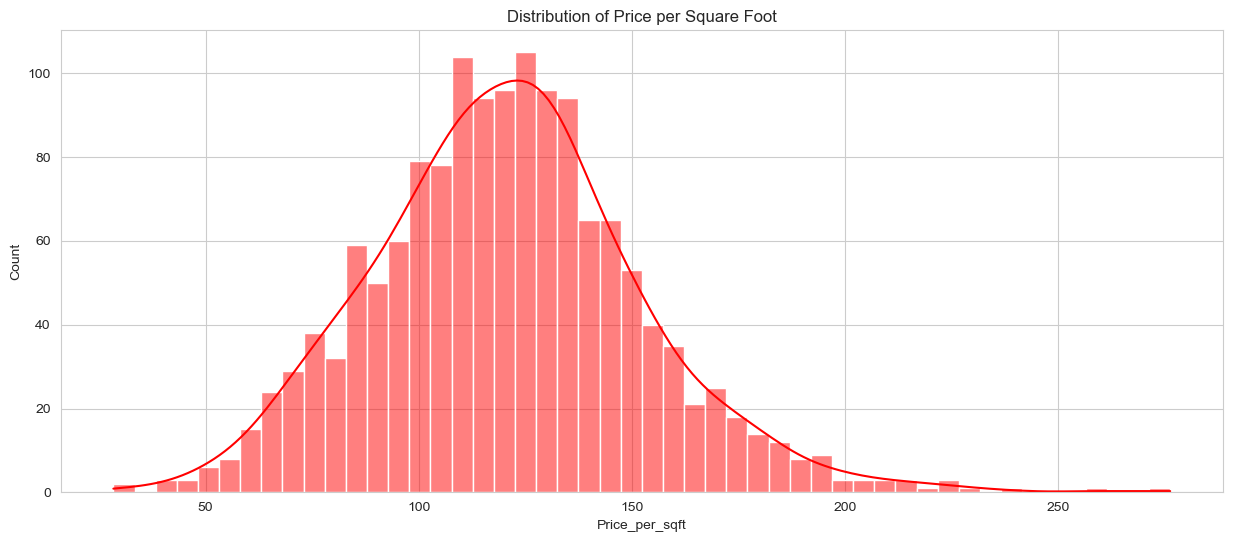

In [36]:
# Price per sqft analysis
plt.figure(figsize=(15, 6))
sns.histplot(df_cleaned['Price_per_sqft'], kde=True, bins=50, color="red")
plt.title('Distribution of Price per Square Foot')
plt.show()

## Insights

##### 1. Price per sqft is approximately normally distributed: 
* The histogram with the overlaid kernel density estimate shows a bell-shaped curve, suggesting that the price per square foot of the houses in the dataset follows a roughly normal distribution.

##### 2. Most houses have a price per sqft around 100-150: 
* The peak of the distribution lies within this range, indicating that the majority of the properties have a price per square foot concentrated around this value.

##### 3. The distribution is slightly right-skewed: 
* The tail on the right side is slightly longer than the left, indicating that there are a few houses with a considerably higher price per square foot, pulling the mean slightly to the right of the median.

##### 4. There's a limited number of very low and very high price per sqft properties: 
* The tails of the distribution are relatively thin, suggesting that extremely cheap or expensive properties (in terms of price per square foot) are less common in this dataset.

##### 5. The distribution provides a good understanding of the central tendency and spread of price per sqft: 
* This plot effectively visualizes the typical price per square foot and the variability around this central value within the housing market represented by the data.

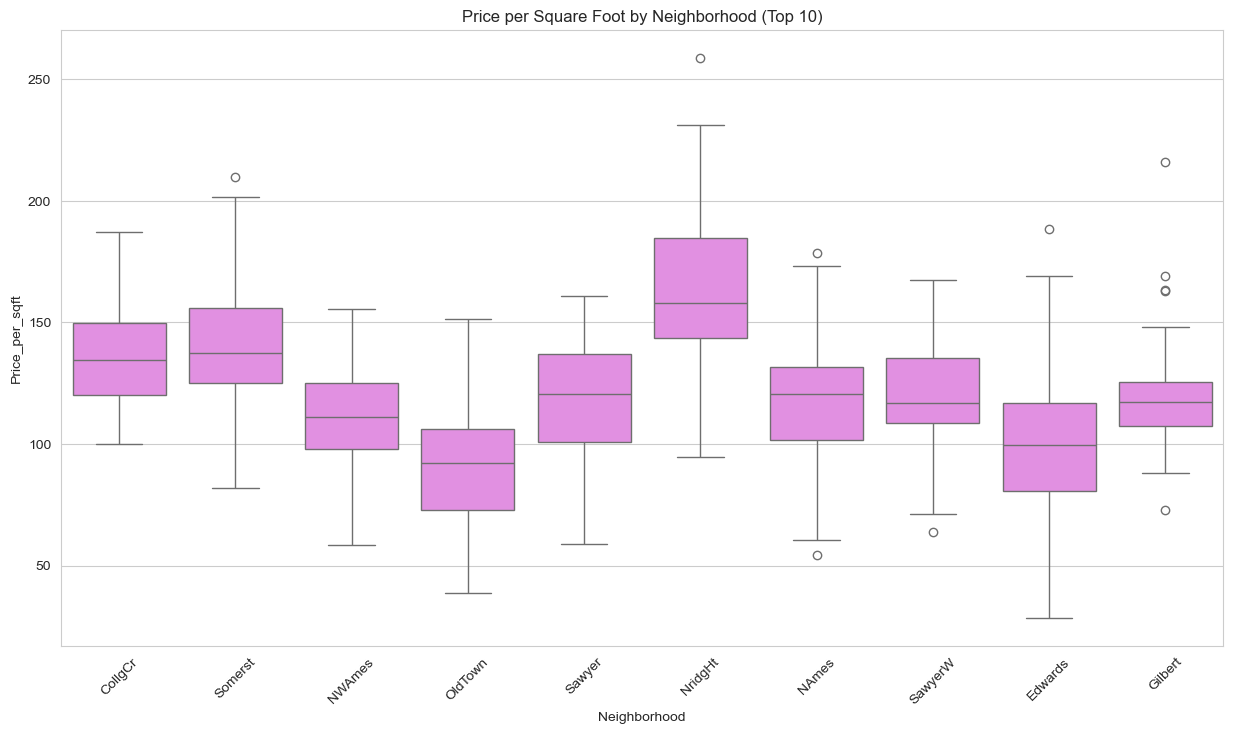

In [37]:
# Price per sqft by neighborhood
top_neighborhoods = df_cleaned['Neighborhood'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='Price_per_sqft', data=df_cleaned[df_cleaned['Neighborhood'].isin(top_neighborhoods)], color="violet")
plt.title('Price per Square Foot by Neighborhood (Top 10)')
plt.xticks(rotation=45)
plt.show()

## Insights

##### 1. Neighborhoods have distinct price per sqft distributions: 
* The median price per square foot varies noticeably across the top 10 neighborhoods.

##### 2. NridgHt generally has the highest price per sqft: 
* The box plot for NridgHt is positioned highest, indicating a higher median and overall range of price per square foot compared to other top neighborhoods.

##### 3. StoneBr also exhibits a high price per sqft: 
* Similar to NridgHt, StoneBr shows a relatively high median price per square foot.

##### 4. OldTown tends to have a lower price per sqft: 
* The box plot for OldTown is positioned lower, suggesting a generally lower price per square foot compared to the higher-priced neighborhoods.

##### 5. Neighborhoods show varying levels of price per sqft variability: 
* The height of the boxes (interquartile range) differs across neighborhoods, indicating different levels of price per square foot consistency within each area. For example, SawyerW appears to have more variability than ClearCr.

##### 6. Outliers are present in most neighborhoods: 
* Most neighborhoods have outliers (dots outside the whiskers), indicating some properties with significantly higher or lower prices per square foot compared to the majority in that area.

##### 7. The plot allows for direct comparison of price levels and spread across top neighborhoods: 
* This visualization is effective for quickly identifying which of the most frequent neighborhoods tend to have higher or lower price per square foot and how spread out those prices are.

### Step 8: Market Trends and Historical Pricing

Explore historical pricing trends over time and understand market influences.

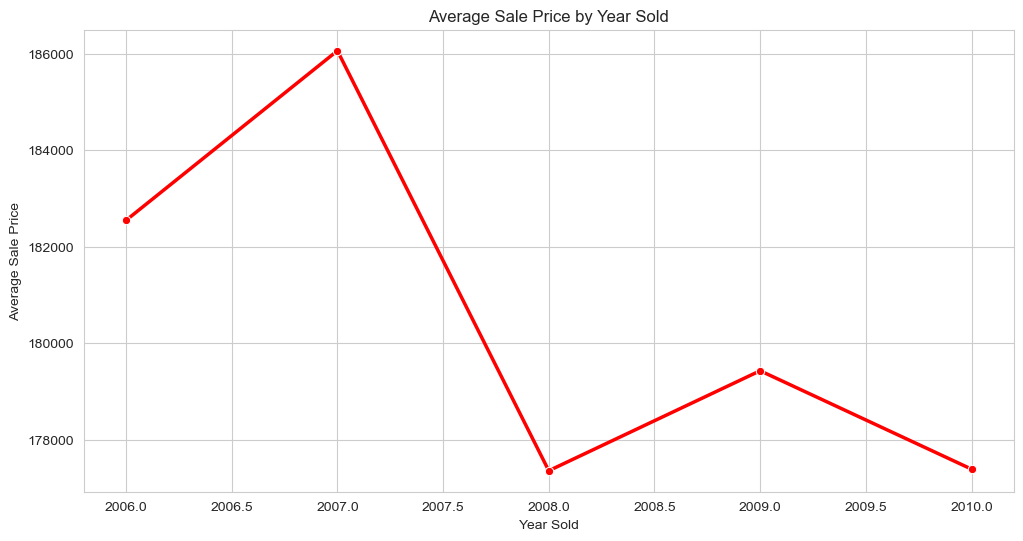

In [38]:
# Yearly trends
yearly_price = df_cleaned.groupby('YrSold')['SalePrice'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=yearly_price, marker='o', linewidth=2.5, color="red")
plt.title('Average Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

## Insights

### Average Sale Price by Year Sold

###### 1. Average Sale Price peaked in 2007: 
* The plot shows the highest average sale price occurred around the year 2007.

##### 2. Significant drop in Average Sale Price around 2009: 
* There's a noticeable decline in the average sale price between 2007 and 2009.

##### 3. Average Sale Price fluctuated over the years: 
* The line shows variability in the average sale price from 2006 to 2010, indicating market changes.

##### 4. Lowest Average Sale Price was in 2008/2010: 
* The plot suggests the lowest average sale prices within this period were around 2008 and 2010.

##### 5. The plot highlights a potential impact of the financial crisis around 2008-2009: 
* The peak followed by a sharp decline in average sale price could be related to the global financial crisis during that period.

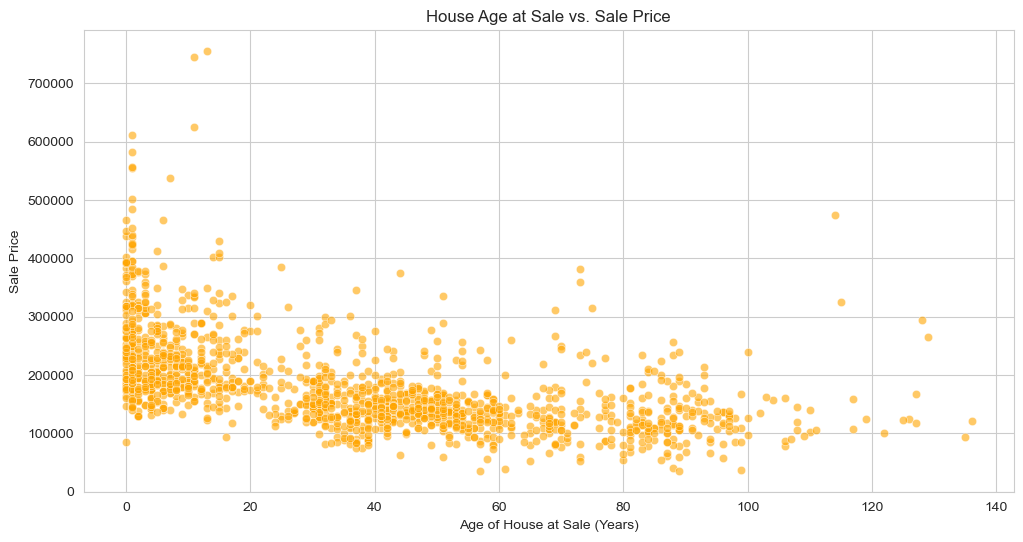

In [39]:
# House age vs sale price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='HouseAge', y='SalePrice', data=df_cleaned, alpha=0.6, color="orange")
plt.title('House Age at Sale vs. Sale Price')
plt.xlabel('Age of House at Sale (Years)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

## Insights

### House age vs sale price

###### 1. General downward trend: 
* There's a general tendency for the sale price to decrease as the age of the house at the time of sale increases.

##### 2. Higher prices concentrated among younger houses: 
* Most of the highest sale prices are observed for houses that are relatively young (age less than 40 years).

##### 3. Wide range of prices for younger houses: 
* Younger houses show a significant spread in sale prices, indicating other factors besides age heavily influence their value.

##### 4. Lower price ceiling for older houses: 
* Older houses (age greater than 60-80 years) generally do not reach the high sale price levels seen in younger properties.

##### 5. Weak negative correlation: 
* While there's a downward trend, the scatter of points suggests a weak negative correlation between house age and sale price, meaning age is not the sole or strongest predictor of sale price.

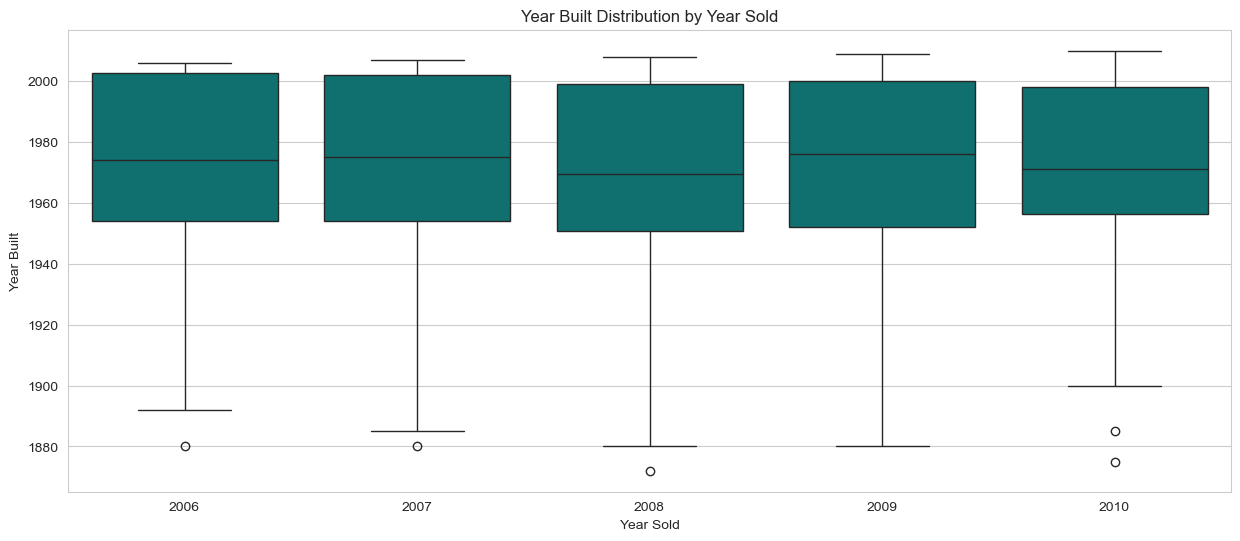

In [40]:
# Year built analysis
plt.figure(figsize=(15, 6))
sns.boxplot(x='YrSold', y='YearBuilt', data=df_cleaned, color="teal")
plt.title('Year Built Distribution by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Year Built')
plt.show()

## Insights

### Year Built Distribution by Year Sold

##### 1. Majority of houses sold in each year were built within a similar timeframe: 
* The interquartile ranges (boxes) for each 'Year Sold' are relatively consistent, suggesting that the bulk of properties sold each year had construction dates spanning roughly the same period.
##### 2. Median year built shows a slight upward trend over time: 
* The median line within each box plot appears to shift slightly upwards from 2006 to 2010, indicating a tendency for slightly newer houses to be sold in later years.

##### 3. Range of year built is wide for each sale year: 
* The whiskers of the box plots extend over a considerable range of 'Year Built' for each 'Year Sold', indicating that both older and newer houses were sold in any given year.

##### 4. Outliers indicate the sale of very old houses in all years: 
* The presence of outliers below the lower whisker in each box plot shows that very old houses (some built before 1900) were sold consistently across the observed years.

##### 5. No dramatic shift in the age of houses being sold: 
* While there's a slight trend towards newer median build years, the overall distribution of house ages sold each year remains relatively stable during the 2006-2010 period.

### Step 9. Customer Preferences and Amenities

Investigate how customer preferences and amenities impact house prices.

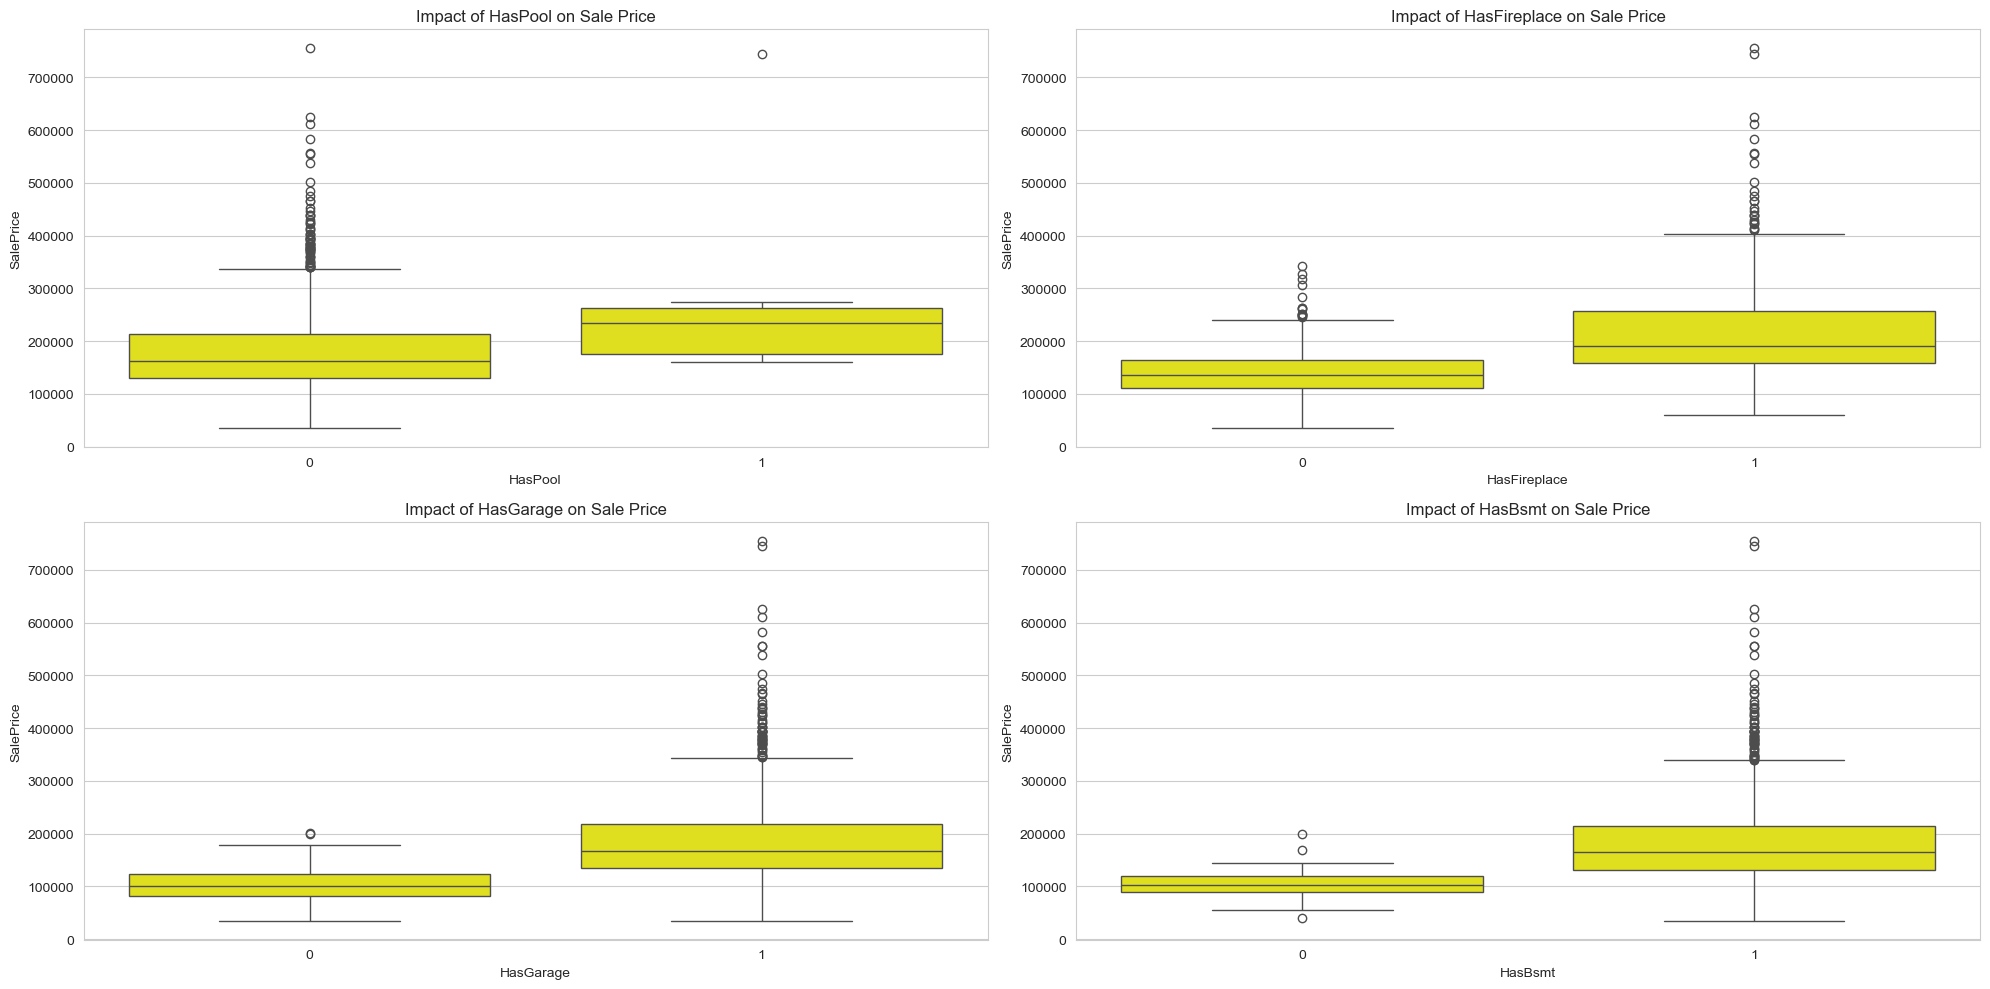

In [41]:
# Amenities impact
amenities = ['HasPool', 'HasFireplace', 'HasGarage', 'HasBsmt']

plt.figure(figsize=(20, 10))
for i, amenity in enumerate(amenities):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=amenity, y='SalePrice', data=df_cleaned, color="yellow")
    plt.title(f'Impact of {amenity} on Sale Price')
plt.tight_layout()
plt.show()

## Insights

### Impact of half-bathrooms, full bathrooms, fireplaces, and garage cars on sale price

##### 1. SalePrice generally increases with the number of FullBath: 
* The median SalePrice clearly rises as the number of full bathrooms increases.

##### 2. HalfBath shows a less consistent positive impact: 
* While a house with half a bathroom tends to have a higher median SalePrice than one with none, the increase isn't as pronounced or consistent as with full bathrooms.

##### 3. Fireplaces have a positive impact on SalePrice: 
* Houses with one or more fireplaces tend to have a higher median SalePrice compared to those with none.

##### 4. GarageCars strongly correlates with higher SalePrice: 
* The median SalePrice increases substantially with each additional car capacity of the garage.

##### 5. Variability in SalePrice increases with more features: 
* For several of these features (FullBath, GarageCars), the spread of SalePrice (interquartile range and outliers) tends to be larger for houses with a higher count of that feature.

##### 6. The number of FullBath and GarageCars appear to be stronger predictors of SalePrice than HalfBath or Fireplaces (based on median shifts): 
* The magnitude of the increase in median SalePrice is more substantial with increasing FullBath and GarageCars compared to HalfBath and the presence of Fireplaces.

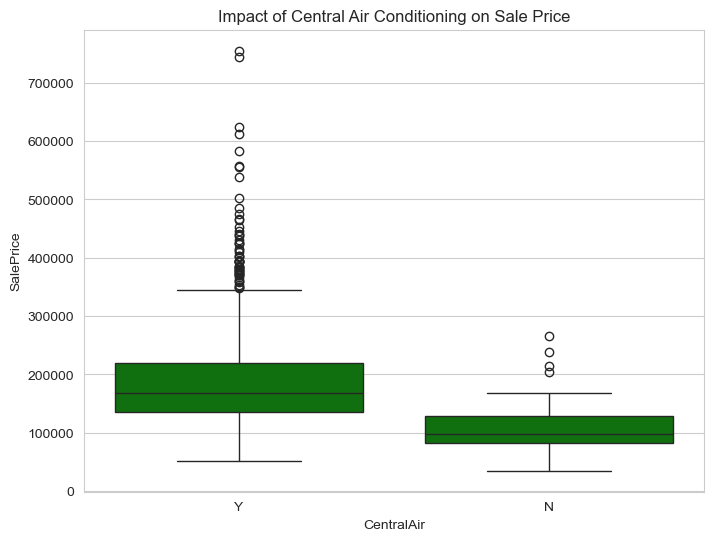

In [42]:
# Central Air conditioning impact
if 'CentralAir' in df_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='CentralAir', y='SalePrice', data=df_cleaned, color="green")
    plt.title('Impact of Central Air Conditioning on Sale Price')
    plt.show()

## Insights

## Impact of Central Air Conditioning on Sale Price

##### 1. Houses with central air conditioning (Y) have significantly higher Sale Prices: 
* The median SalePrice for houses with central air is substantially greater than for those without (N).

##### 2. Wider range of Sale Prices for houses with central air: 
* The box plot for 'Y' shows a much larger interquartile range and a higher upper whisker, indicating greater variability and the presence of more expensive homes among those with central AC.

##### 3. Lower price ceiling for houses without central air: 
* The Sale Prices for houses without central AC are generally capped at a lower value compared to those with it.

##### 4. Outliers suggest some expensive houses lack central air, and some cheaper houses have it: 
* The presence of outliers in both categories indicates exceptions to the general trend, but they are more prominent on the higher end for houses with central air.

##### 5. Central air conditioning is a strong positive indicator of Sale Price: 
* The clear separation and difference in the distributions strongly suggest that having central air conditioning is a significant factor contributing to a higher sale price.

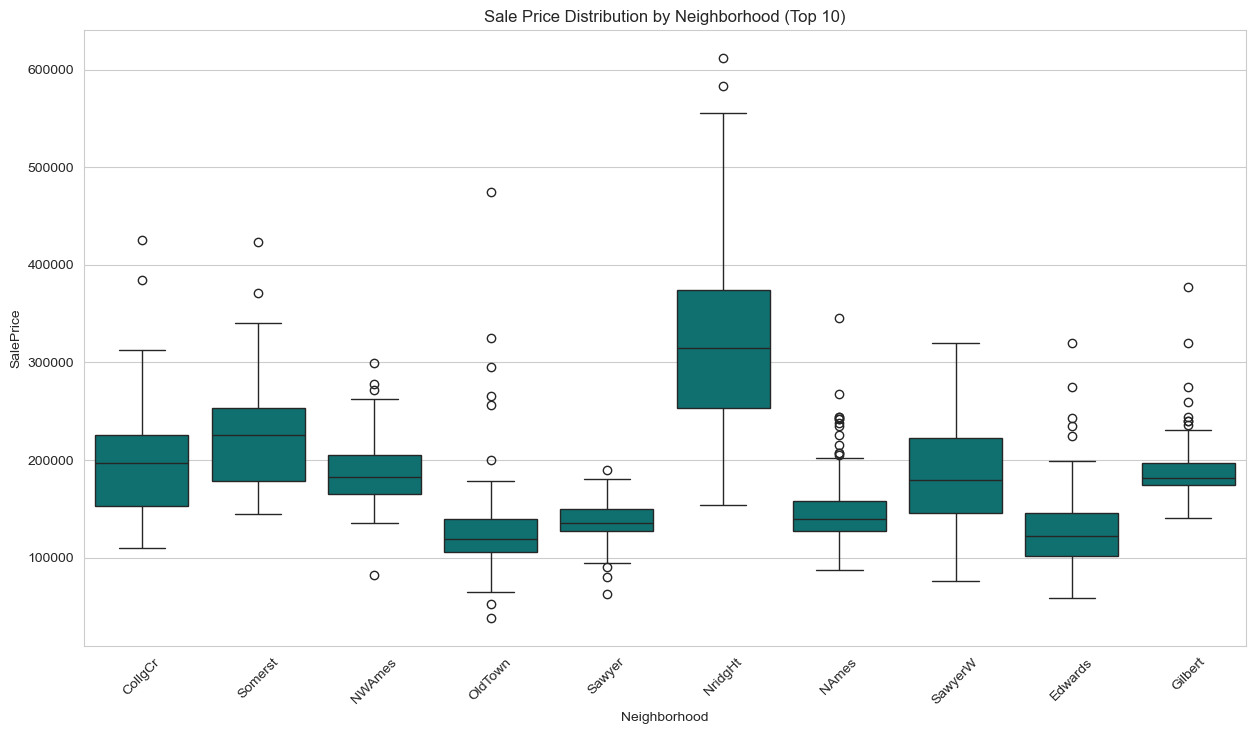

In [43]:
# Neighborhood analysis
top_neighborhoods = df_cleaned['Neighborhood'].value_counts().head(10).index

plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_cleaned[df_cleaned['Neighborhood'].isin(top_neighborhoods)], color="teal")
plt.title('Sale Price Distribution by Neighborhood (Top 10)')
plt.xticks(rotation=45)
plt.show()

## Insights

### Sale Price Distribution by Neighborhood (Top 10)

##### 1. Significant variation in Sale Price across neighborhoods: 
* The median Sale Price differs considerably among the top 10 neighborhoods.

##### 2. NridgHt has the highest median Sale Price: 
* This neighborhood consistently shows the highest central tendency for sale prices.

##### 3. OldTown has one of the lowest median Sale Prices: 
* Properties in OldTown tend to sell for a lower price compared to most other top neighborhoods.

##### 4. Neighborhoods exhibit different levels of Sale Price variability: 
* The height of the boxes (IQR) varies, indicating different degrees of price spread within each neighborhood. For example, NridgHt has a larger spread than NPkVill.

##### 5. Outliers are present in all neighborhoods: 
* Each neighborhood has outliers, indicating some properties sold for prices significantly higher or lower than the typical range for that area.

##### 6. SawyerW and Edwards have relatively lower median Sale Prices: 
* Besides OldTown, these neighborhoods also show lower central tendencies for sale prices.

##### 7. The plot allows for direct comparison of price distributions by location: 
* This visualization is useful for understanding the typical price range and potential price extremes in the most frequently occurring neighborhoods.

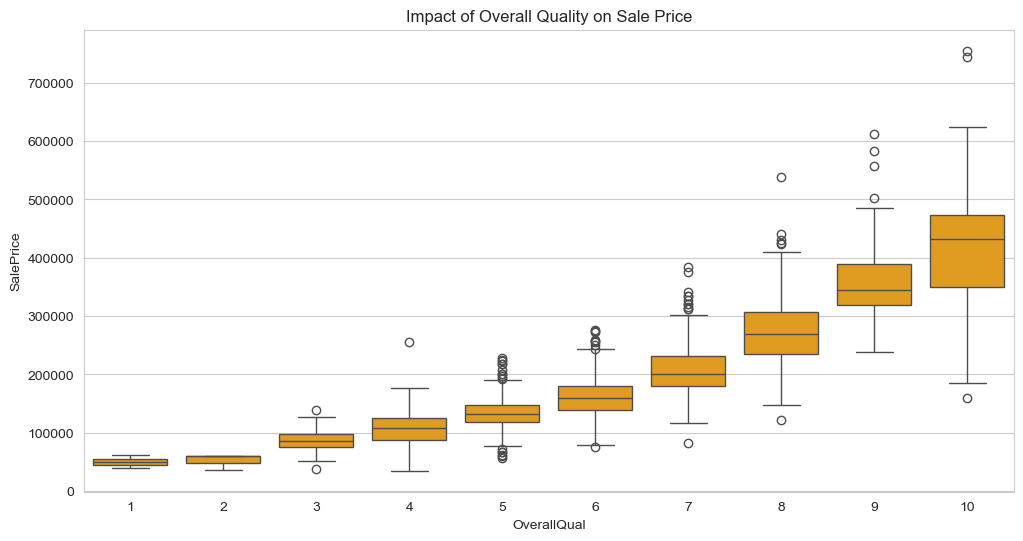

In [44]:
# Overall quality impact
if 'OverallQual' in df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='OverallQual', y='SalePrice', data=df_cleaned, color="orange")
    plt.title('Impact of Overall Quality on Sale Price')
    plt.show()

## Insights

### Impact of Overall Quality on Sale Price

##### 1. Strong positive correlation: 
* Sale Price clearly increases as the Overall Quality rating increases.

##### 2. Significant jump in Sale Price at higher quality levels: 
* The median Sale Price shows substantial increases as Overall Quality moves from average (around 5) to good (7-8) and excellent (9-10).

##### 3. Increasing variability with higher quality: 
* The spread of Sale Prices (interquartile range) tends to widen for houses with higher Overall Quality ratings, indicating a greater range of prices for more desirable properties.

##### 4. Lower price ceiling for lower quality: 
* Houses with lower Overall Quality ratings generally have a much lower maximum Sale Price compared to higher-rated homes.

##### 5. Outliers present across all quality levels: 
* There are outliers at all Overall Quality levels, suggesting some properties sell for prices significantly above or below the typical range for their quality.

##### 6. Overall Quality is a strong predictor of Sale Price: 
* This plot visually confirms that the overall quality of the house is a major determinant of its sale price.

##### 7. Distinct price tiers based on quality: 
* The box plots reveal relatively distinct price tiers associated with different levels of Overall Quality, highlighting the market's valuation of this feature.

### Step 10: Advanced Analysis: Outlier Detection

In [45]:
z_scores = np.abs(stats.zscore(df_cleaned['SalePrice']))
outliers = df_cleaned[z_scores > 3]

print(f"Number of outliers detected in SalePrice: {len(outliers)}")

Number of outliers detected in SalePrice: 22


### Visualize outliers

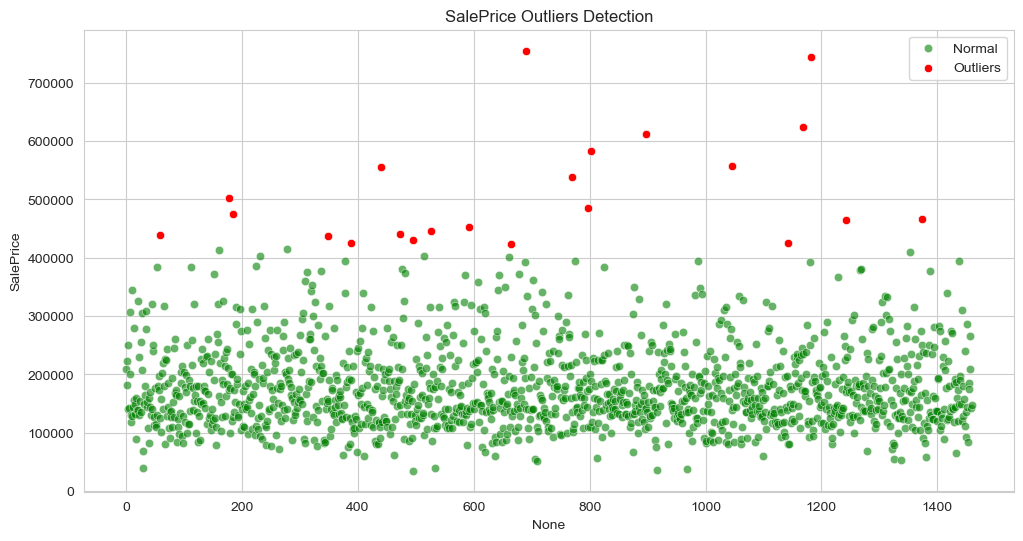

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned.index, y='SalePrice', data=df_cleaned, color='green', alpha=0.6, label='Normal')
sns.scatterplot(x=outliers.index, y='SalePrice', data=outliers, color='red', label='Outliers')
plt.title('SalePrice Outliers Detection')
plt.legend()
plt.show()

## Insights

###  SalePrice Outliers Detection

##### 1. Majority of data points are clustered in a lower SalePrice range: 
* Most houses have SalePrices below approximately $300,000.

##### 2. Outliers are scattered across the higher SalePrice range: 
* Several data points with significantly higher SalePrices (above $350,000 - $400,000) are identified as outliers.

##### 3. Outliers are relatively infrequent: 
* Compared to the normal data points, the number of identified outliers is considerably smaller.

##### 4. No clear pattern in the occurrence of outliers based on the index: 
* The outliers do not appear to be clustered around specific index values, suggesting they are not related to the order of the data.

##### 5. The plot visually separates typical SalePrices from unusually high ones: 
* This visualization effectively highlights the instances of exceptionally priced houses in the dataset.

### Step 10: Advanced Analysis - Price Segmentation

In [47]:
# Create price segments
df_cleaned['PriceSegment'] = pd.qcut(df_cleaned['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Analyze characteristics of each segment
segment_analysis = df_cleaned.groupby('PriceSegment', observed=False).agg({
    'GrLivArea': 'mean',
    'TotalBath': 'mean',
    'OverallQual': 'mean',
    'HouseAge': 'mean',
    'HasGarage': 'mean',
    'HasFireplace': 'mean'
}).round(2)

display(segment_analysis)

,GrLivArea,TotalBath,OverallQual,HouseAge,HasGarage,HasFireplace
PriceSegment,,,,,,
Low,1113.54,1.50,4.81,62.55,0.82,0.19
Medium,1323.36,1.96,5.53,44.94,0.97,0.41
High,1590.45,2.53,6.42,23.16,0.99,0.64
Premium,2039.66,2.86,7.65,15.36,1.00,0.87


## Insights

##### 1. Price segments show increasing mean values across features: 
* As the PriceSegment moves from 'Low' to 'Premium', the mean values for features like GrLivArea, TotalBath, OverallQual, HouseAge, HasGarage, and HasFireplace generally increase.

##### 2. 'Premium' segment has the highest mean values for most features: 
* Properties in the 'Premium' price segment tend to have the largest living area, most bathrooms, highest overall quality, are the newest, and most likely to have a garage and fireplace.

##### 3. 'Low' segment has the lowest mean values for most features: 
* Conversely, the 'Low' price segment is characterized by properties with smaller living areas, fewer bathrooms, lower overall quality, are the oldest, and least likely to have a garage and fireplace.

##### 4. HouseAge shows an inverse relationship with PriceSegment: 
* The mean HouseAge decreases as the PriceSegment increases, indicating newer houses tend to fall into higher price segments.

##### 5. HasGarage and HasFireplace show increasing likelihood with higher PriceSegment: 
* The mean values for these binary features (0 or 1) increase across the price segments, suggesting that having a garage and a fireplace are more common in higher-priced homes.

##  Key Findings and Recommendations

### Key Findings:

##### 1. **Size Matters**: Square footage (both above ground and basement) shows strong positive correlation with sale price.
##### 2. **Quality Counts**: Overall quality rating is the most strongly correlated feature with sale price
##### 3. **Amenities Add Value**: Homes with garages, fireplaces, and basements tend to command higher prices.
##### 4. **Location Impact**: Certain neighborhoods consistently show higher prices per square foot.
##### 5. **Age Factor**: Newer homes and recently remodeled homes sell for higher prices
##### 6. **Market Trends**: Prices showed some variation across years, suggesting external economic factors at play.


### Recommendations:
##### 1. **Pricing Strategy**: Consider square footage, quality ratings, and amenities as primary pricing factors.
##### 2. **Investment Focus**: Recommend renovations that improve quality ratings and add desirable amenities
##### 3. **Market Positioning**: Highlight size, quality, and amenities in marketing materials for premium properties.
##### 4. **Neighborhood Analysis**: Further investigate why certain neighborhoods command higher prices.
##### 5. **Economic Monitoring**: Track external economic indicators that may explain yearly price variations.
##### 6. **Customer Preferences**: Conduct surveys to understand which amenities are most valued by buyer.

### Conclusion* This analysis helped uncover the key factors that affect house prices. It gives a solid, data-backed base for smarter pricing and investment decisions. Using regression models next could help predict prices more accurately..